### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import sys
import os

# Add project root to Python path
project_root = os.path.join(os.path.dirname(os.getcwd()))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import from src
from src.config import hosp_path, icu_path, label_path

import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.grid'] = True

In [2]:
base_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'processed')
features_path = os.path.join(base_path, 'extracted_features.csv')

# Comprehensice EHR Data Descriptive Analysis

## Data Preview

In [3]:
print(f"Loading data from {features_path}")
df = pd.read_csv(features_path)

# Display basic info
print(f"Dataset shape: {df.shape}")
print(f"Number of patients: {len(df)}")
print(f"Number of features: {len(df.columns)}")

# Preview the data
df.head()

Loading data from c:\Users\Davon\Desktop\University\Semester 8\AI Capstone\Final Project\data\processed\extracted_features.csv
Dataset shape: (16922, 469)
Number of patients: 16922
Number of features: 469


subject_id_x  hadm_id  stay_id               intime              outtime  \
0        103061   205323   320855  2161-09-30 10:00:53  2161-10-01 17:33:33   
1        115922   202942   317562  2130-12-17 12:45:00  2130-12-23 17:02:38   
2        100573   211228   300212  2114-04-14 23:24:00  2114-04-24 18:25:13   
3        113171   201479   309713  2157-09-23 14:49:34  2157-10-04 14:16:46   
4        111478   218479   302511  2142-10-04 20:18:01  2142-10-09 22:24:02   

   icu_stay_seq      earliest_record  duration_hours           window_end  \
0             1  2161-09-30 09:00:00       32.559167  2161-09-30 16:00:53   
1             1  2130-12-17 12:45:00      148.293889  2130-12-17 18:45:00   
2             1  2114-04-14 22:23:00      236.036944  2114-04-15 05:24:00   
3             1  2157-09-23 14:49:00      263.462778  2157-09-23 20:49:34   
4             1  2142-10-04 20:00:00      122.400556  2142-10-05 02:18:01   

        window_end_bmi  ... liver_dysfunction  cardiac_dysfunction  \
0  2161-10-01 10:00:53  ...               NaN             0.119481   
1  2130-12-18 12:45:00  ...               NaN             0.312026   
2  2114-04-15 23:24:00  ...               NaN             0.355358   
3  2157-09-24 14:49:34  ...               NaN             0.132468   
4  2142-10-05 20:18:01  ...               NaN             0.428334   

   respiratory_dysfunction  hematologic_dysfunction total_organ_dysfunction  \
0                 0.002484                 0.440774                0.154035   
1                 0.043194                 0.612126                0.255492   
2                 0.038194                      NaN                0.196776   
3                 0.013371                      NaN                0.072919   
4                 0.034613                 0.413038                0.240715   

   heart_rate_trend  resp_rate_trend  sbp_trend  map_trend  mortality  
0               NaN              NaN        NaN        NaN          0  
1          1.257143        -0.400000        NaN   3.000000          0  
2         -0.571429         0.185714  -8.214286        NaN          0  
3          7.513514         1.432432        NaN  -6.459459          0  
4         -2.971429        -1.085714 -13.271429        NaN          0  

[5 rows x 469 columns]

## Checking Missing Values

In [4]:
# Basic data types and null values
print("Data Types and Null Values:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': round(df.isnull().sum() / len(df) * 100, 2)
})

df_info.sort_values('Null Percentage', ascending=False).head(20)

Data Types and Null Values:


Data Type  Non-Null Count  Null Count  \
urine_output_total                float64               0       16922   
bmi                               float64               0       16922   
bilirubin_delta_4to6              float64               4       16918   
alkaline_phosphatase_delta_4to6   float64               5       16917   
bilirubin_delta_2to3              float64               5       16917   
bilirubin_delta_3to4              float64               5       16917   
alkaline_phosphatase_delta_2to3   float64               6       16916   
alkaline_phosphatase_delta_3to4   float64               6       16916   
anion_gap_delta_3to4              float64              19       16903   
glucose_delta_3to4                float64              19       16903   
creatinine_delta_3to4             float64              20       16902   
bicarbonate_delta_3to4            float64              21       16901   
bun_delta_3to4                    float64              20       16902   
chloride_delta_3to4               float64              22       16900   
bilirubin_delta_1to2              float64              22       16900   
sodium_delta_3to4                 float64              22       16900   
potassium_delta_3to4              float64              23       16899   
alkaline_phosphatase_delta_1to2   float64              23       16899   
glucose_delta_4to6                float64              31       16891   
bicarbonate_delta_4to6            float64              31       16891   

                                 Null Percentage  
urine_output_total                        100.00  
bmi                                       100.00  
bilirubin_delta_4to6                       99.98  
alkaline_phosphatase_delta_4to6            99.97  
bilirubin_delta_2to3                       99.97  
bilirubin_delta_3to4                       99.97  
alkaline_phosphatase_delta_2to3            99.96  
alkaline_phosphatase_delta_3to4            99.96  
anion_gap_delta_3to4                       99.89  
glucose_delta_3to4                         99.89  
creatinine_delta_3to4                      99.88  
bicarbonate_delta_3to4                     99.88  
bun_delta_3to4                             99.88  
chloride_delta_3to4                        99.87  
bilirubin_delta_1to2                       99.87  
sodium_delta_3to4                          99.87  
potassium_delta_3to4                       99.86  
alkaline_phosphatase_delta_1to2            99.86  
glucose_delta_4to6                         99.82  
bicarbonate_delta_4to6                     99.82

<Figure size 12000x6000 with 0 Axes>

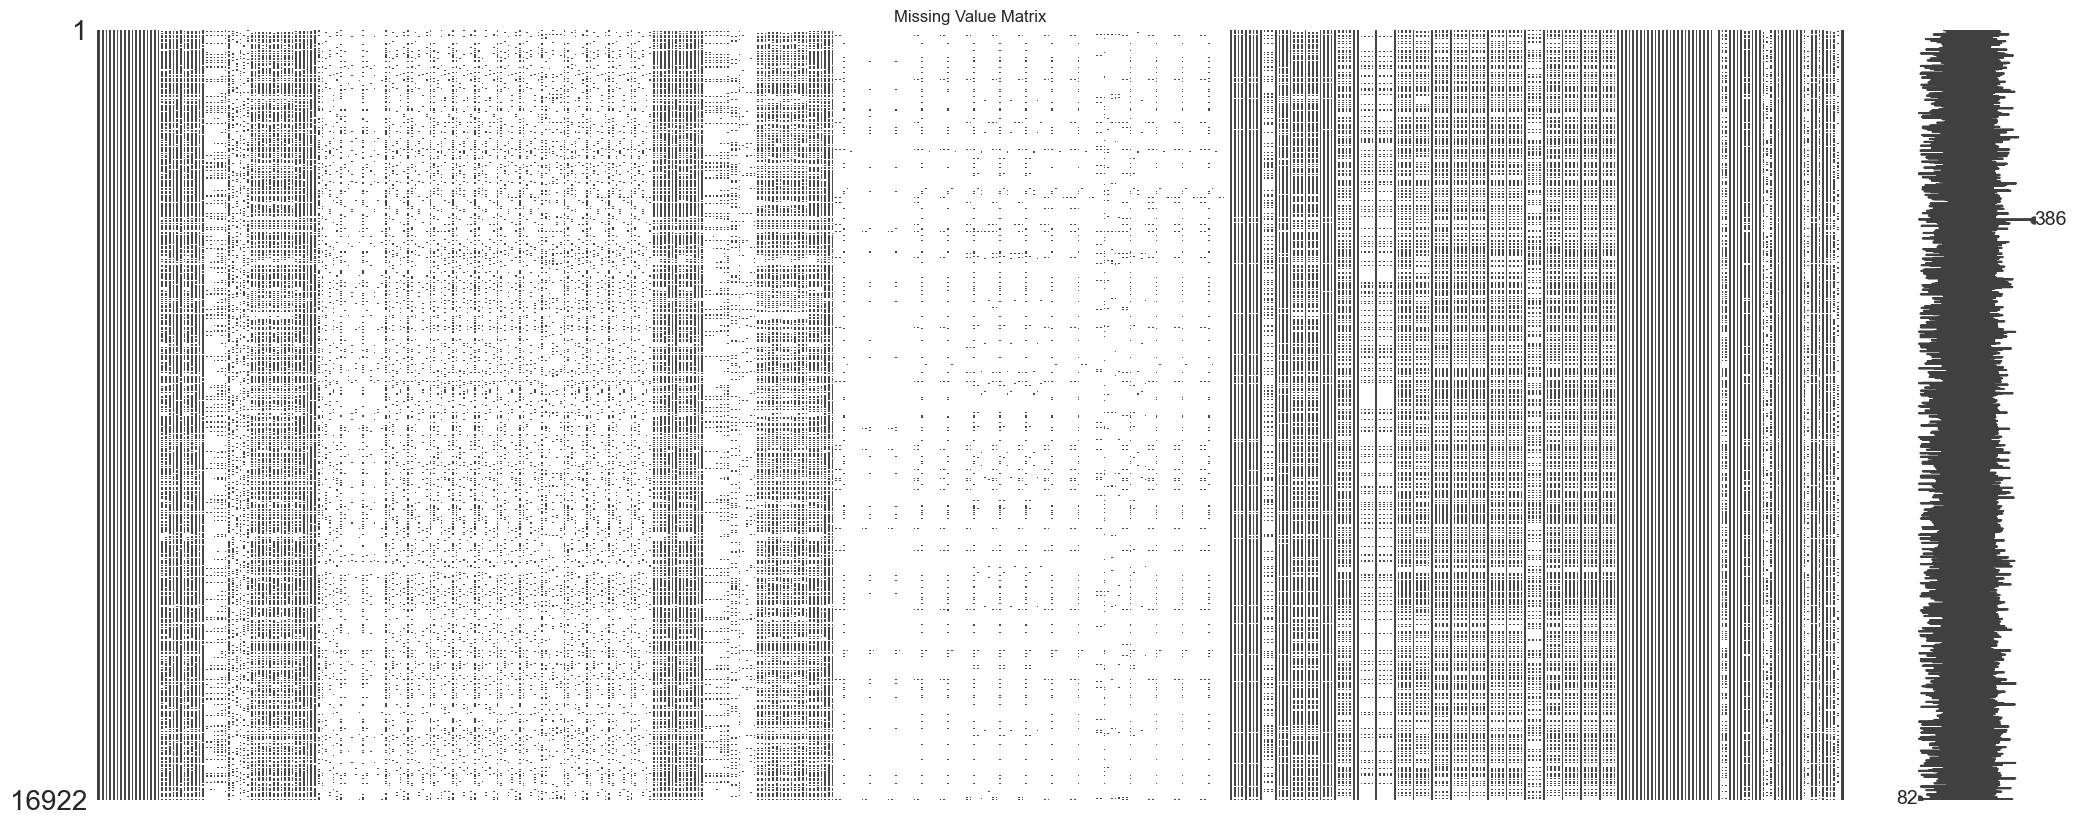

<Figure size 12000x10000 with 0 Axes>

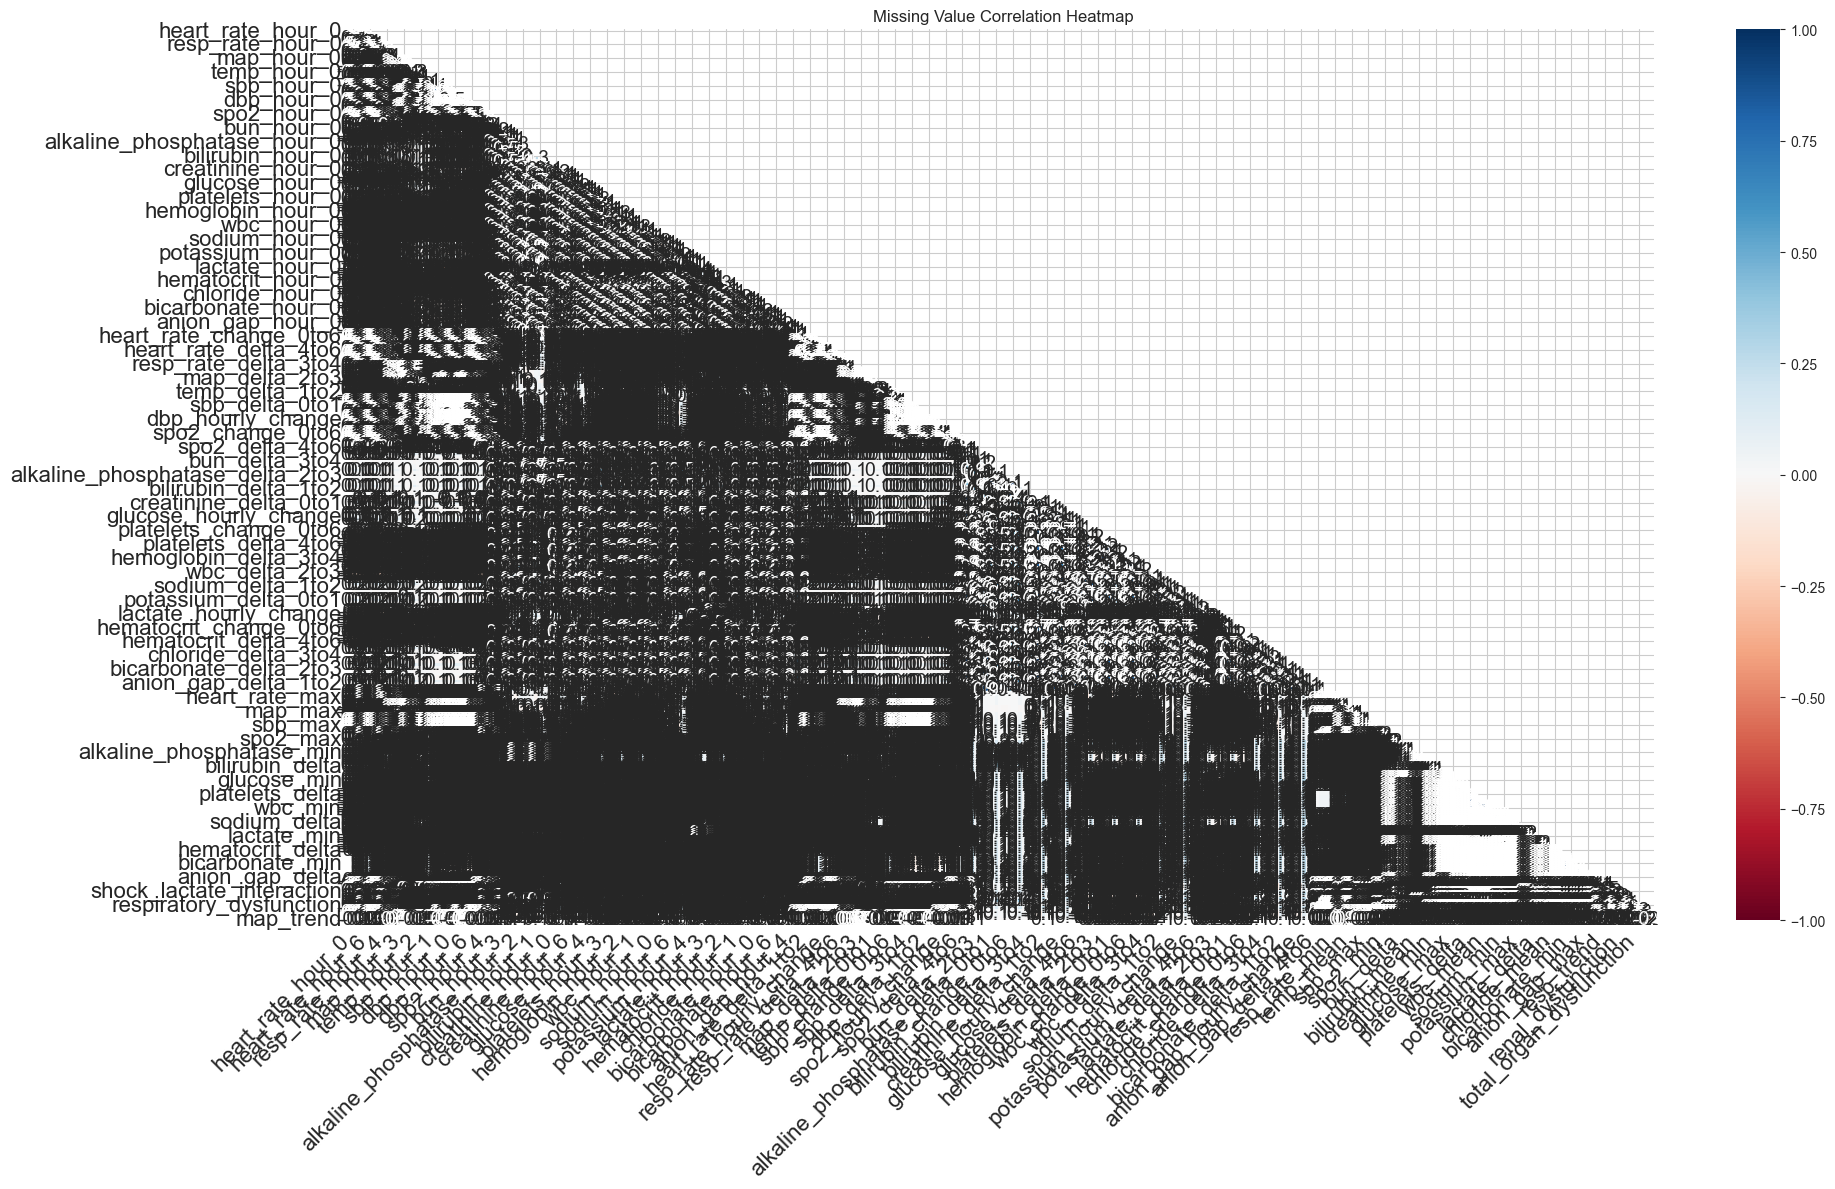

In [5]:
# Visualize missing values
plt.figure(figsize=(120, 60))
msno.matrix(df)
plt.title("Missing Value Matrix")
plt.tight_layout()
plt.show()

# Missing value correlation
plt.figure(figsize=(120, 100))
msno.heatmap(df)
plt.title("Missing Value Correlation Heatmap")
plt.tight_layout()
plt.show()

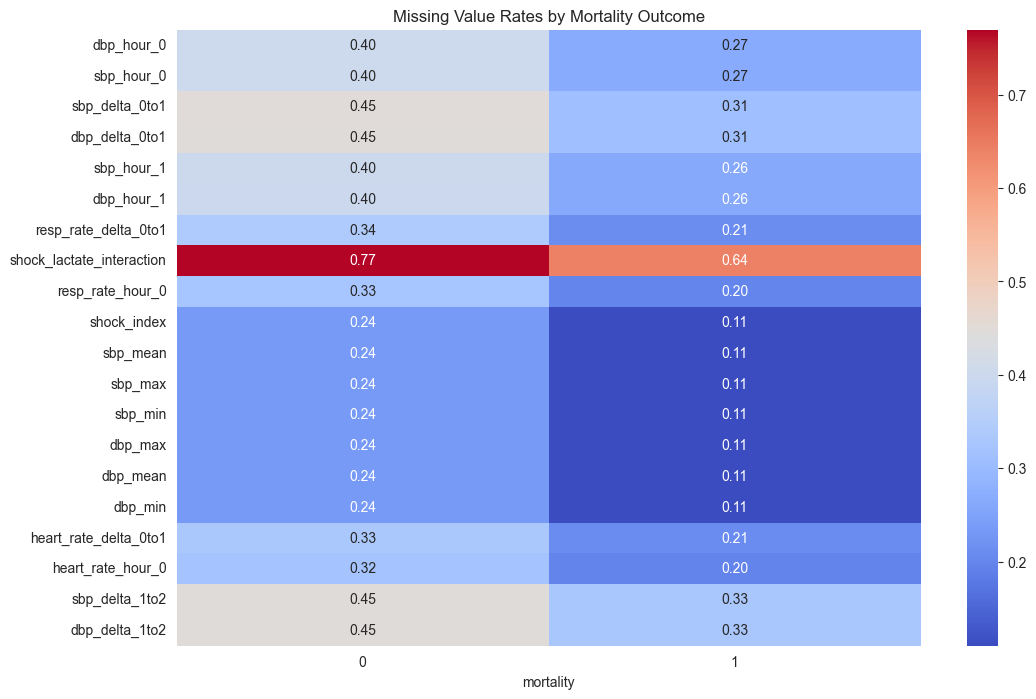

ModuleNotFoundError: No module named 'statsmodels.stats.missing'

In [ ]:
# Ensure correct version of statsmodels for mcar_little_test
%pip install "statsmodels>=0.13.0"

# Analyze missingness patterns
import missingno as msno

# Identify numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Check if missingness is related to outcome
missing_by_outcome = pd.DataFrame()
for col in numeric_features:
    if df[col].isnull().any():
        missing_by_outcome[col] = df.groupby('mortality')[col].apply(lambda x: x.isnull().mean())

# Plot missingness by outcome
missing_diff = abs(missing_by_outcome.loc[1] - missing_by_outcome.loc[0])
missing_diff = missing_diff.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(missing_by_outcome[missing_diff.index[:20]].T, cmap='coolwarm', 
            annot=True, fmt='.2f')
plt.title('Missing Value Rates by Mortality Outcome')
plt.show()

# Identify usable features (excluding outcome and identifiers)
usable_features = [col for col in df.columns if col not in ['mortality', 'patient_id', 'admission_id']]

# Analyze missing data mechanisms
from statsmodels.stats.missing import mcar_little_test
test_result = mcar_little_test(df[usable_features])
print(f"Little's MCAR test p-value: {test_result.pvalue}")
print(f"Likely {'MCAR' if test_result.pvalue > 0.05 else 'MAR or MNAR'} missingness mechanism")

## Separating Numeric and Categorical Features

In [6]:
# Separate numeric and categorical features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Number of numeric features: {len(numeric_features)}")
print(f"Number of categorical features: {len(categorical_features)}")

# Remove ID columns from analysis if present
id_cols = [col for col in df.columns if 'id' in col.lower()]
numeric_features = [col for col in numeric_features if col not in id_cols]
categorical_features = [col for col in categorical_features if col not in id_cols]

print("\nNumeric features (sample):", numeric_features[:10])
print("\nCategorical features:", categorical_features)

Number of numeric features: 457
Number of categorical features: 12

Numeric features (sample): ['icu_stay_seq', 'duration_hours', 'anchor_age', 'anchor_year', 'gender_numeric', 'admittime_year', 'age', 'heart_rate_hour_0', 'heart_rate_hour_1', 'heart_rate_hour_2']

Categorical features: ['intime', 'outtime', 'earliest_record', 'window_end', 'window_end_bmi', 'gender', 'admittime', 'age_group', 'age_young_adult', 'age_elderly', 'age_very_elderly']


### Numeric Values Analysis

In [7]:
# Descriptive statistics for numeric variables
desc_stats = df[numeric_features].describe().T
desc_stats['missing_pct'] = df[numeric_features].isnull().sum() * 100 / len(df)
desc_stats['cv'] = desc_stats['std'] / desc_stats['mean']  # Coefficient of variation

# Add skewness and kurtosis
desc_stats['skewness'] = df[numeric_features].skew()
desc_stats['kurtosis'] = df[numeric_features].kurt()

# Sort by missing percentage
desc_stats.sort_values('missing_pct', ascending=False).head(20)

count       mean        std   min   25%  \
urine_output_total                 0.0        NaN        NaN   NaN   NaN   
bmi                                0.0        NaN        NaN   NaN   NaN   
bilirubin_delta_4to6               4.0   0.225000   0.386221   0.0  0.00   
bilirubin_delta_2to3               5.0   0.020000   0.044721   0.0  0.00   
bilirubin_delta_3to4               5.0   0.360000   0.694982   0.0  0.00   
alkaline_phosphatase_delta_4to6    5.0   9.000000  28.257742  -9.0 -6.00   
alkaline_phosphatase_delta_3to4    6.0  13.500000  23.304506   0.0  0.00   
alkaline_phosphatase_delta_2to3    6.0  -1.333333   3.777124  -8.0 -2.25   
glucose_delta_3to4                19.0   1.736842  54.356684 -89.0 -4.00   
anion_gap_delta_3to4              19.0   0.736842   3.812874  -9.0  0.00   
creatinine_delta_3to4             20.0  -0.025000   0.158529  -0.5 -0.10   
bun_delta_3to4                    20.0  -0.250000   1.208522  -3.0 -1.00   
bicarbonate_delta_3to4            21.0   0.523810   2.182179  -5.0  0.00   
bilirubin_delta_1to2              22.0   0.077273   0.187545  -0.1  0.00   
sodium_delta_3to4                 22.0   1.545455   3.582062  -4.0  0.00   
potassium_delta_3to4              23.0  -0.478261   1.017553  -4.4 -0.75   
alkaline_phosphatase_delta_1to2   23.0   3.869565  13.032492 -30.0  0.00   
anion_gap_delta_4to6              30.0  -1.566667   6.881676 -31.0 -2.75   
creatinine_delta_4to6             31.0   0.035484   0.130508  -0.2  0.00   
bicarbonate_delta_4to6            31.0   0.612903   6.184267 -23.0 -1.50   

                                  50%     75%    max  missing_pct         cv  \
urine_output_total                NaN     NaN    NaN   100.000000        NaN   
bmi                               NaN     NaN    NaN   100.000000        NaN   
bilirubin_delta_4to6             0.05   0.275    0.8    99.976362   1.716538   
bilirubin_delta_2to3             0.00   0.000    0.1    99.970453   2.236068   
bilirubin_delta_3to4             0.10   0.100    1.6    99.970453   1.930506   
alkaline_phosphatase_delta_4to6  0.00   1.000   59.0    99.970453   3.139749   
alkaline_phosphatase_delta_3to4  1.00  16.250   58.0    99.964543   1.726260   
alkaline_phosphatase_delta_2to3  0.00   0.000    3.0    99.964543  -2.832843   
glucose_delta_3to4               0.00   1.500  167.0    99.887720  31.296273   
anion_gap_delta_3to4             0.00   2.500    9.0    99.887720   5.174615   
creatinine_delta_3to4            0.00   0.000    0.3    99.881811  -6.341177   
bun_delta_3to4                   0.00   0.000    2.0    99.881811  -4.834089   
bicarbonate_delta_3to4           0.00   2.000    7.0    99.875901   4.165978   
bilirubin_delta_1to2             0.00   0.100    0.8    99.869992   2.427054   
sodium_delta_3to4                0.00   3.750   11.0    99.869992   2.317805   
potassium_delta_3to4            -0.20   0.000    0.8    99.864082  -2.127612   
alkaline_phosphatase_delta_1to2  0.00  12.500   31.0    99.864082   3.367947   
anion_gap_delta_4to6            -1.00   1.000    8.0    99.822716  -4.392559   
creatinine_delta_4to6            0.00   0.100    0.4    99.816807   3.677944   
bicarbonate_delta_4to6           1.00   3.000   15.0    99.816807  10.090120   

                                 skewness   kurtosis  
urine_output_total                    NaN        NaN  
bmi                                   NaN        NaN  
bilirubin_delta_4to6             1.913687   3.680409  
bilirubin_delta_2to3             2.236068   5.000000  
bilirubin_delta_3to4             2.207186   4.896802  
alkaline_phosphatase_delta_4to6  2.115335   4.578880  
alkaline_phosphatase_delta_3to4  1.887723   3.341828  
alkaline_phosphatase_delta_2to3 -1.182723   1.815224  
glucose_delta_3to4               1.399482   4.470019  
anion_gap_delta_3to4            -0.398840   2.140261  
creatinine_delta_3to4           -0.952251   4.034081  
bun_delta_3to4                  -0.260910   0.884974  
bicarbonate_delta_3to4           0.65053

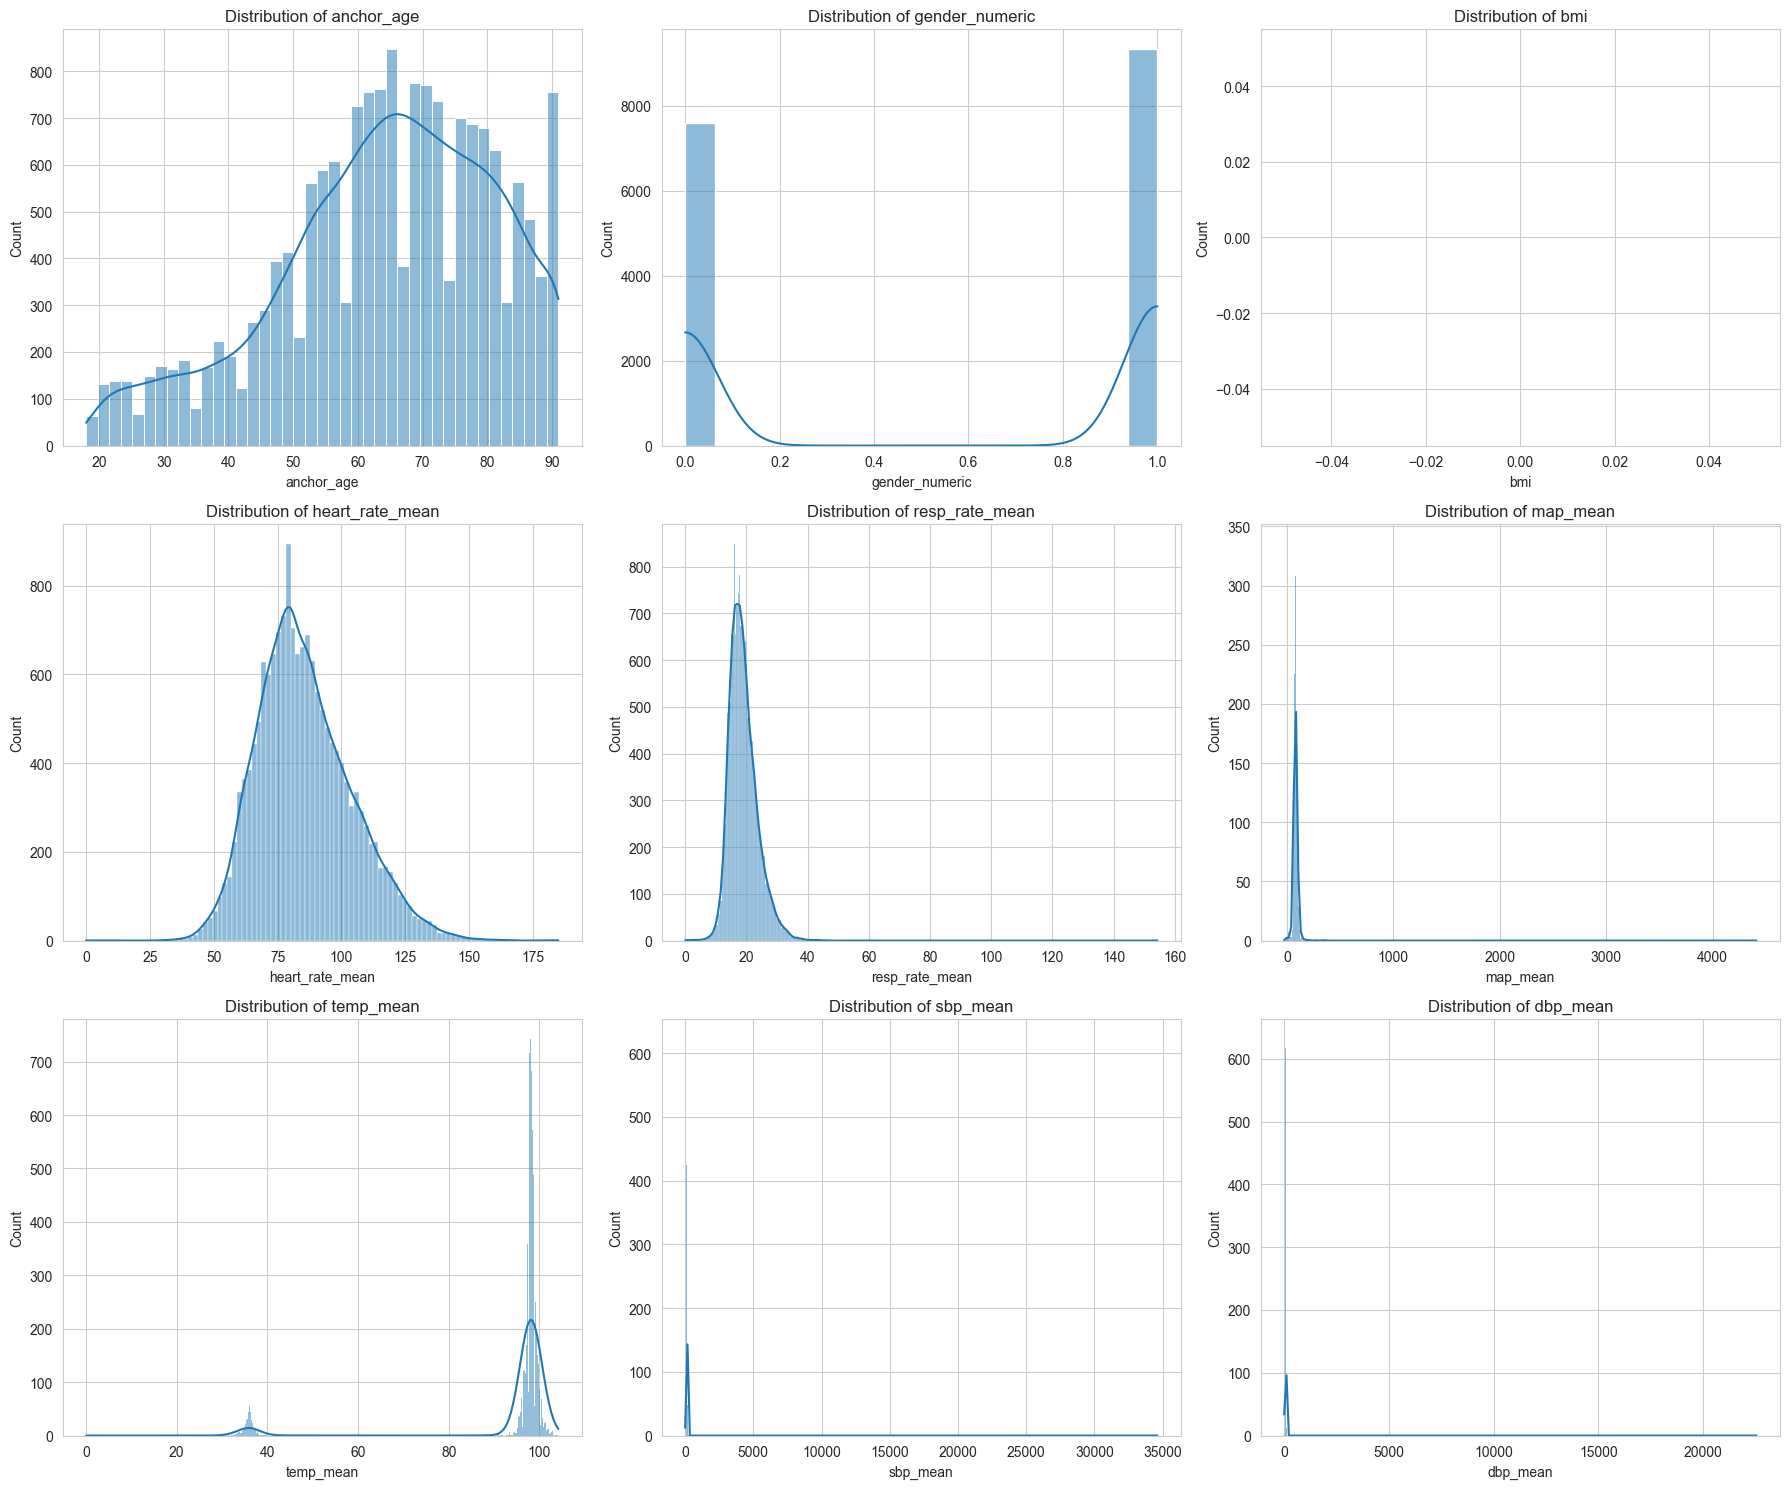

In [8]:
# Function to plot histograms for numeric variables
def plot_histograms(dataframe, features, rows=3, cols=3):
    """Plot histograms for selected numeric features"""
    fig = plt.figure(figsize=(18, 5*rows))
    
    for i, feature in enumerate(features):
        if i >= rows*cols:
            break
            
        ax = fig.add_subplot(rows, cols, i+1)
        sns.histplot(dataframe[feature].dropna(), kde=True, ax=ax)
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Plot histograms for key features
key_features = ['anchor_age', 'gender_numeric', 'bmi']
key_features.extend([col for col in numeric_features if '_mean' in col][:6])
plot_histograms(df, key_features)

### Boxplots for Key Vital Signs and Lab Values

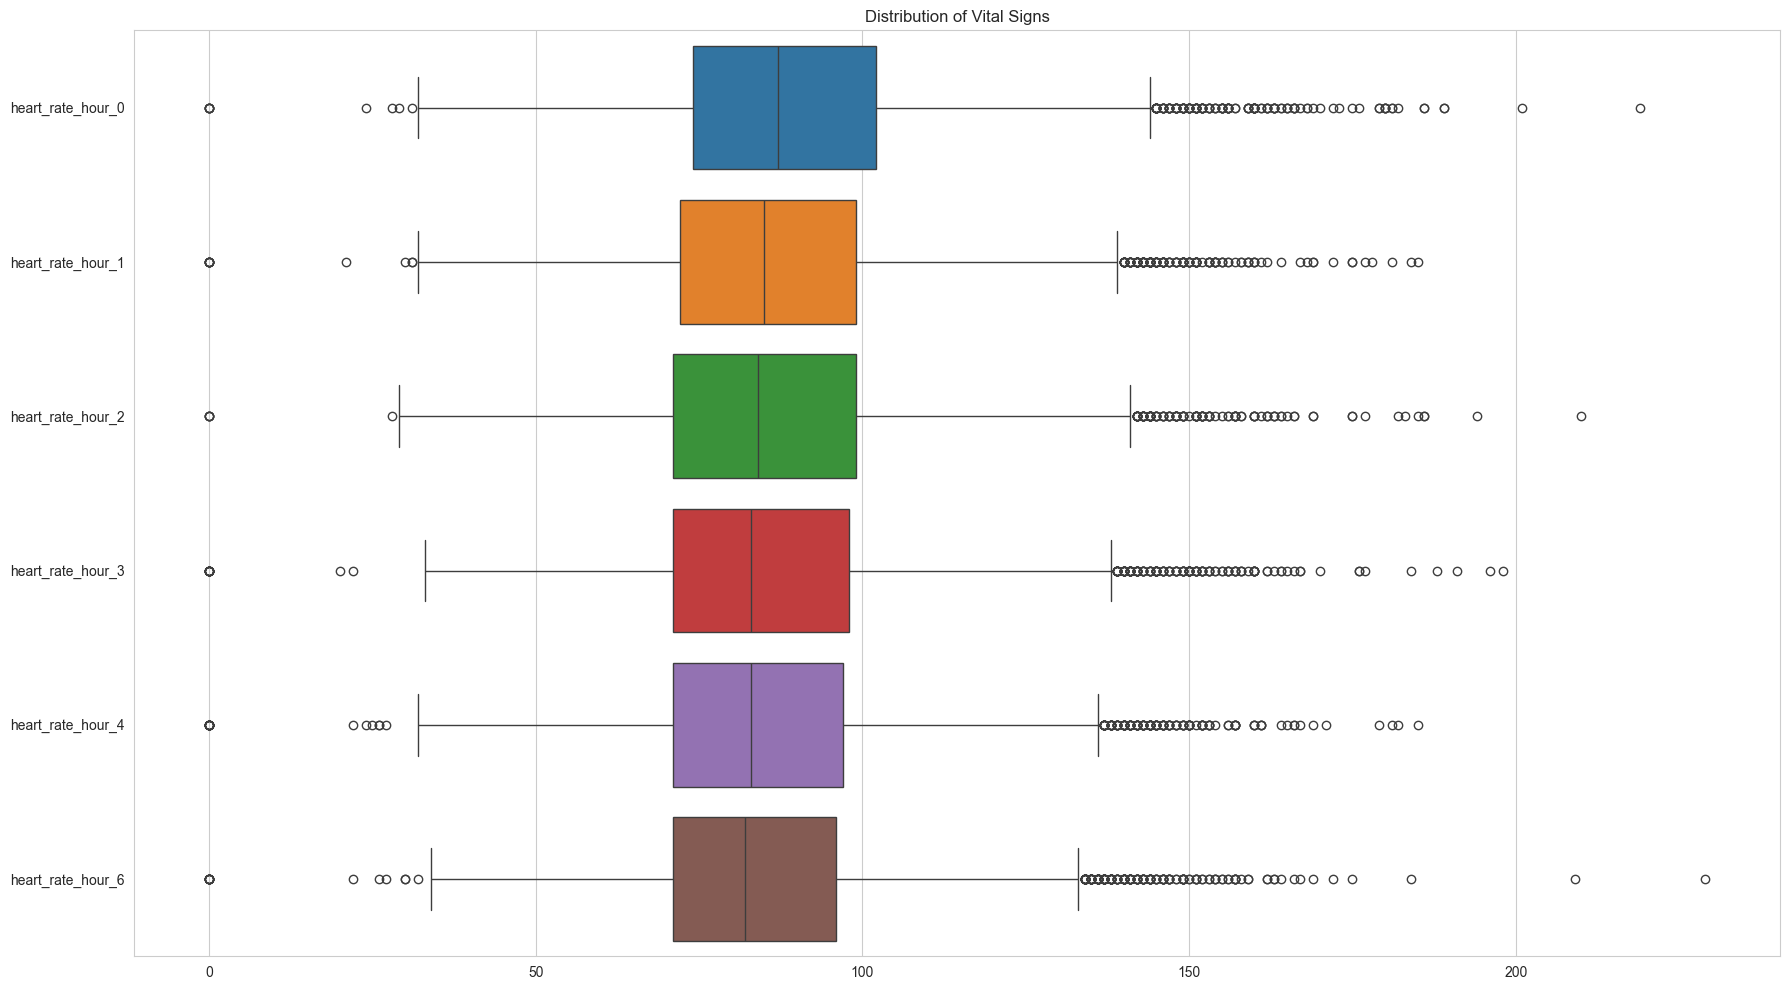

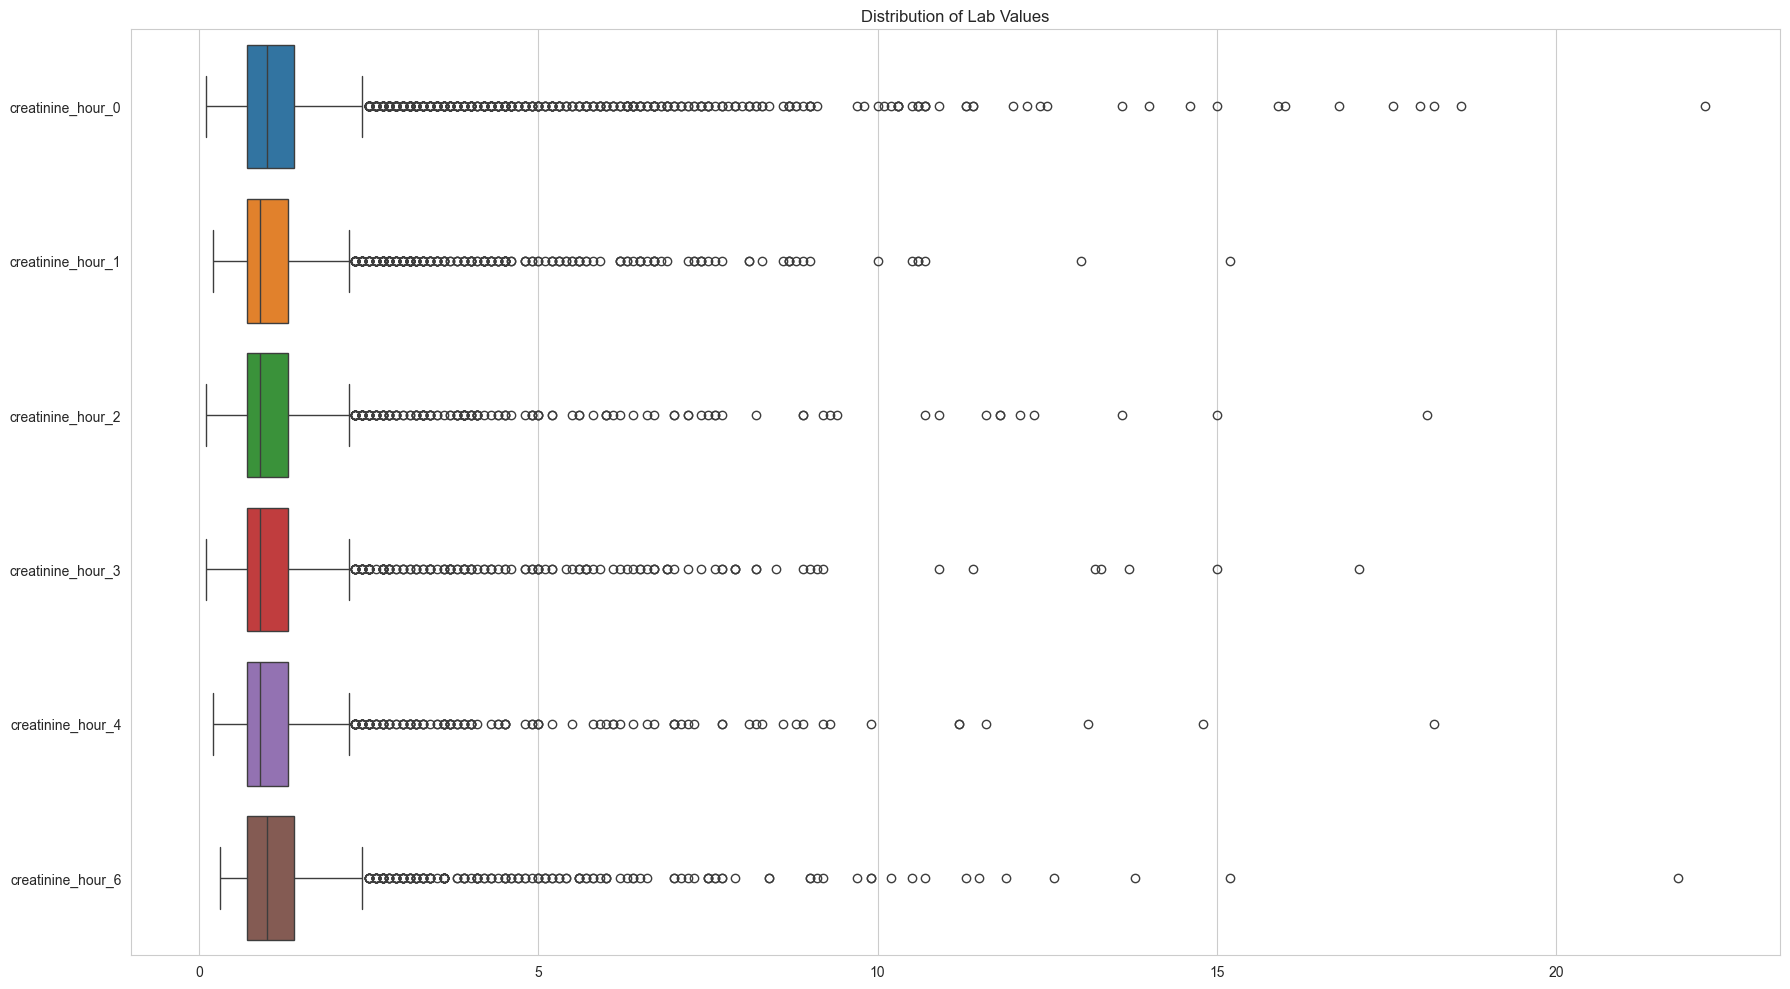

In [9]:
# Plot boxplots for key vital signs and lab values
vital_features = [col for col in numeric_features if any(x in col for x in ['heart_rate', 'resp_rate', 'map', 'sbp', 'dbp', 'spo2'])]
lab_features = [col for col in numeric_features if any(x in col for x in ['glucose', 'creatinine', 'sodium', 'potassium', 'hemoglobin', 'wbc'])]

plt.figure(figsize=(18, 10))
sns.boxplot(data=df[vital_features[:6]], orient='h')
plt.title("Distribution of Vital Signs")
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 10))
sns.boxplot(data=df[lab_features[:6]], orient='h')
plt.title("Distribution of Lab Values")
plt.tight_layout()
plt.show()

## Identify Outliers

Features with most outliers:
alkaline_phosphatase_measured    3854
bilirubin_measured               3838
dbp_measured                     3544
sbp_measured                     3543
mortality                        3531
cardiac_dysfunction              2818
hematocrit_delta                 2739
lactate_delta                    2617
platelets_delta                  2468
hemoglobin_delta                 2396
wbc_delta                        2367
temp_min                         2060
temp_mean                        1883
duration_hours                   1852
has_fever_or_hypothermia         1769
temp_max                         1750
heart_rate_delta_3to4            1354
temp_measured                    1351
resp_rate_delta_2to3             1289
resp_rate_delta_3to4             1281
dtype: int64


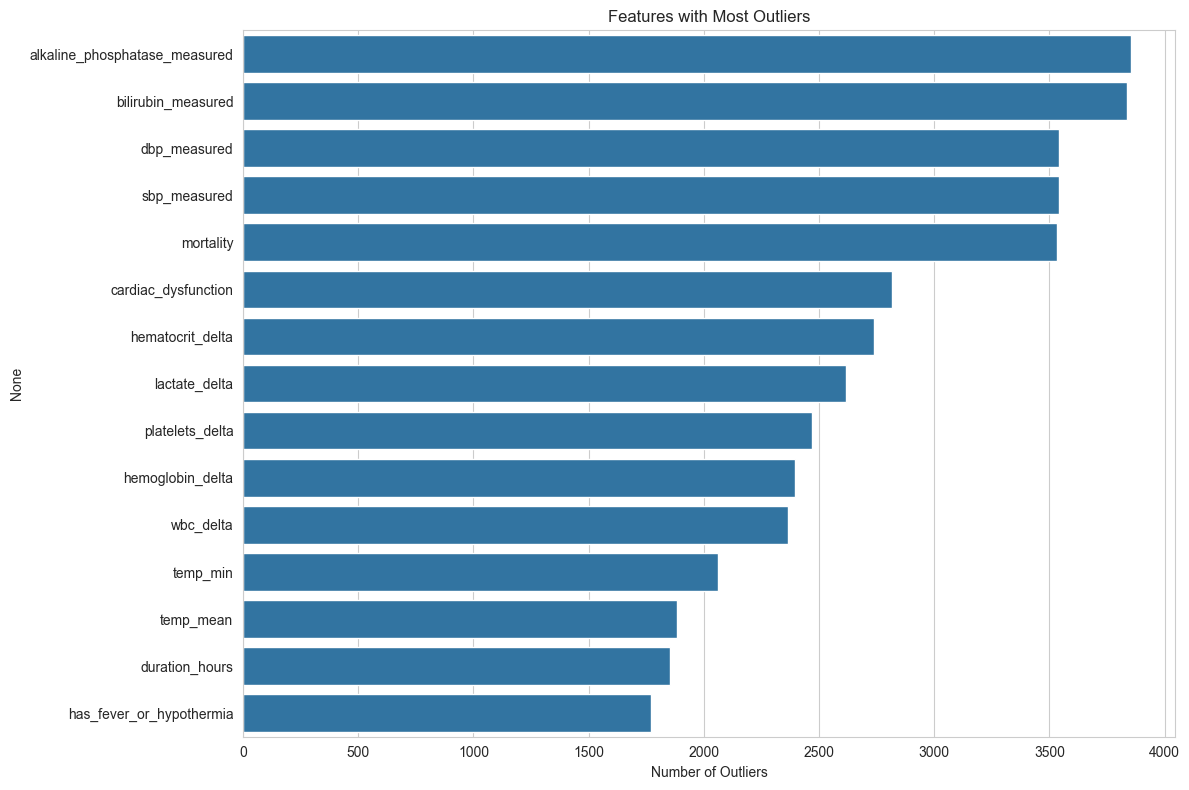

In [10]:
# Identify outliers using IQR method
def detect_outliers(df, features):
    """Detect outliers using IQR method and return counts"""
    outliers_count = {}
    
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers_count[col] = len(outliers)
    
    return pd.Series(outliers_count)

# Get outlier counts for numeric features
numeric_no_id = [col for col in numeric_features if not ('id' in col.lower() or 'count' in col.lower())]
outliers = detect_outliers(df, numeric_no_id)
outliers = outliers.sort_values(ascending=False)

print("Features with most outliers:")
print(outliers.head(20))

# Visualize top features with outliers
plt.figure(figsize=(12, 8))
sns.barplot(x=outliers.head(15).values, y=outliers.head(15).index)
plt.title("Features with Most Outliers")
plt.xlabel("Number of Outliers")
plt.tight_layout()
plt.show()

## Correlation Analysis

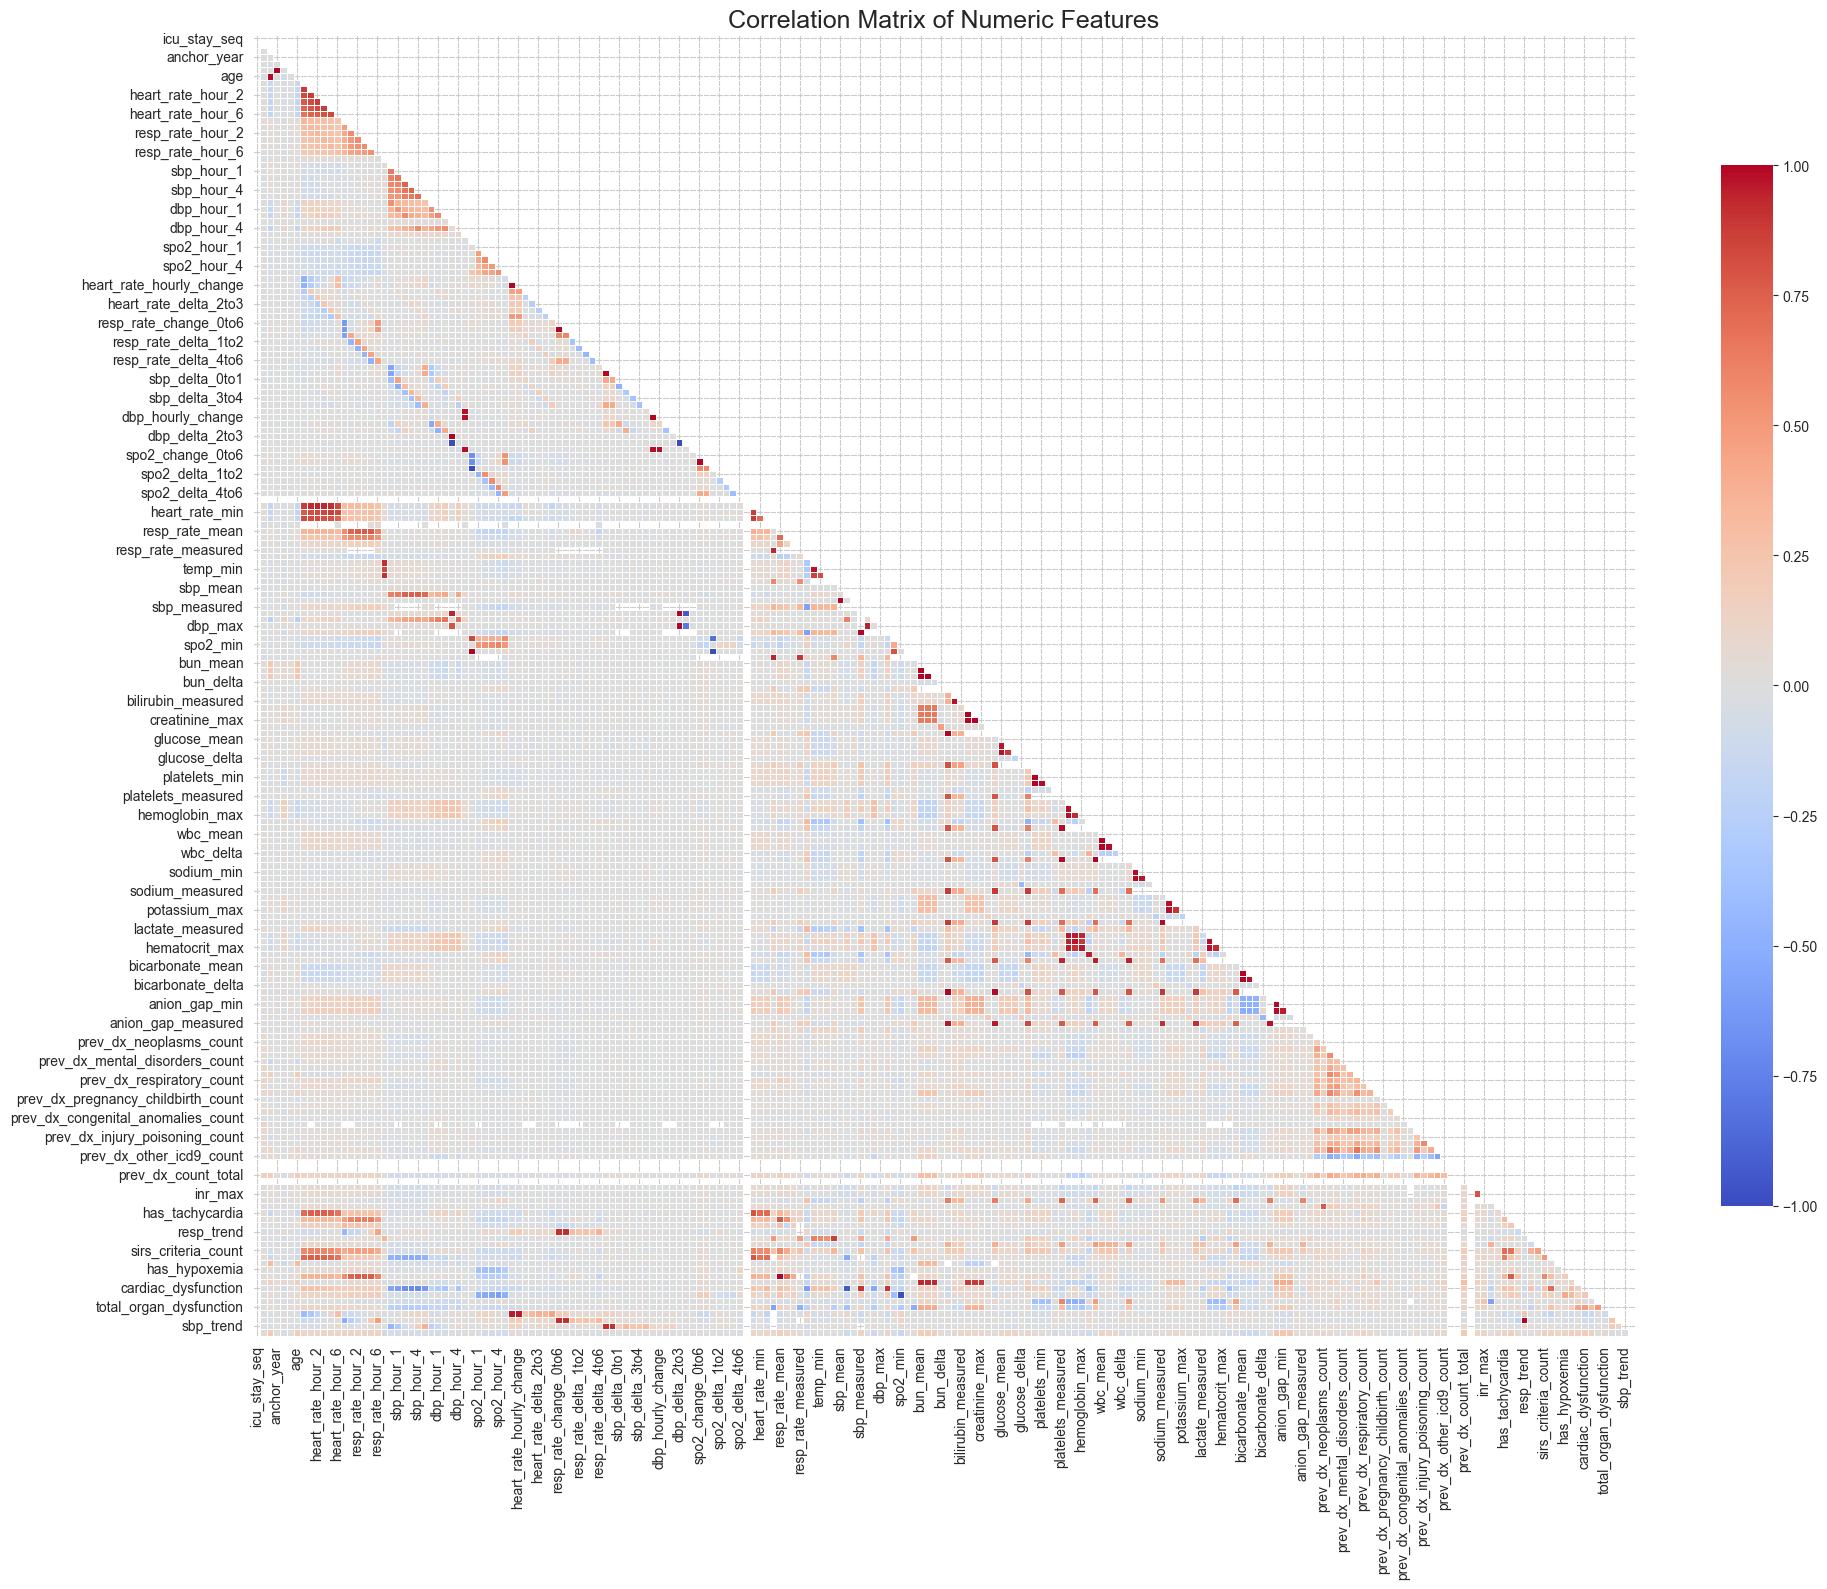

Feature 1                 Feature 2  Correlation
85          dbp_change_0to6         dbp_hourly_change     1.000000
74   heart_rate_change_0to6  heart_rate_hourly_change     1.000000
93         spo2_change_0to6        spo2_hourly_change     1.000000
225              resp_trend           resp_rate_trend     1.000000
77    resp_rate_change_0to6   resp_rate_hourly_change     1.000000
..                      ...                       ...          ...
192            wbc_measured           sodium_measured     0.704114
184     hemoglobin_measured        potassium_measured     0.702888
183     hemoglobin_measured           sodium_measured     0.702558
164      platelets_measured        potassium_measured     0.701159
67               dbp_hour_4                   dbp_min     0.700755

[227 rows x 3 columns]

In [11]:
# Correlation analysis for numeric variables
# Use only features with less than 50% missing values
low_missing_features = [col for col in numeric_features 
                        if df[col].isnull().mean() < 0.5 and 'id' not in col.lower()]

# Calculate correlation matrix
corr_matrix = df[low_missing_features].corr()

# Plot correlation matrix
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
            vmin=-1, vmax=1, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features', fontsize=18)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Find most highly correlated pairs
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:  # Threshold of 0.7
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display most highly correlated pairs
corr_pairs_df = pd.DataFrame(corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
corr_pairs_df = corr_pairs_df.sort_values('Correlation', key=abs, ascending=False)
corr_pairs_df

## Categorical Features (Age)

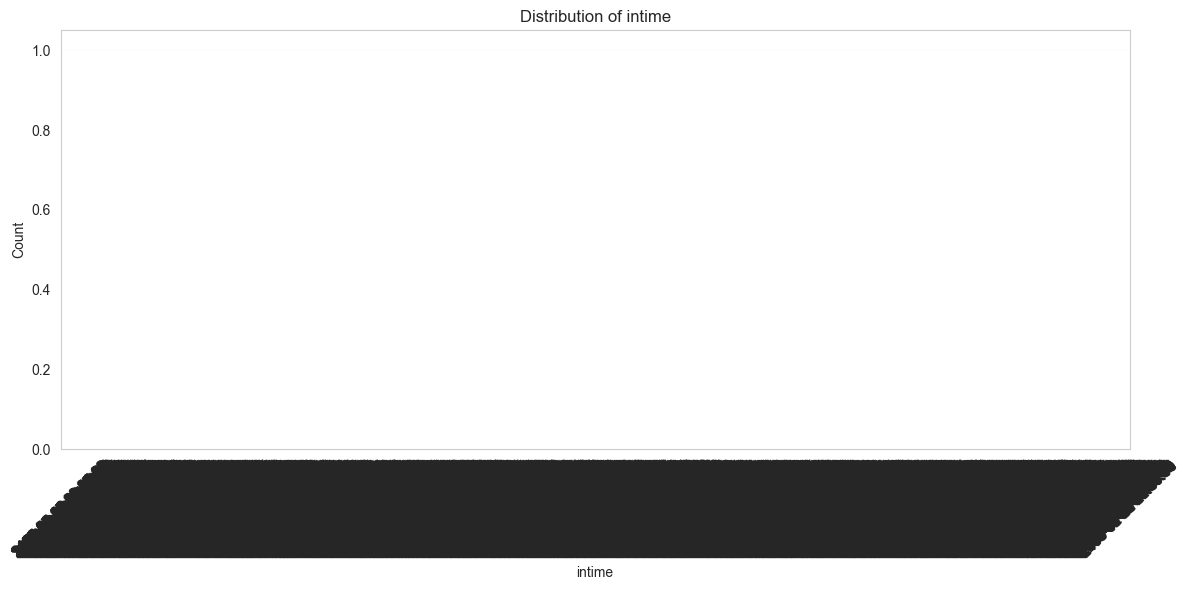


Frequency Table for intime:
                     Count  Percentage
intime                                
2166-01-25 09:26:28      1    0.005909
2161-09-30 10:00:53      1    0.005909
2130-12-17 12:45:00      1    0.005909
2114-04-14 23:24:00      1    0.005909
2157-09-23 14:49:34      1    0.005909
...                    ...         ...
2147-02-10 20:59:43      1    0.005909
2192-07-17 20:14:38      1    0.005909
2130-08-19 00:25:00      1    0.005909
2177-10-20 23:56:15      1    0.005909
2134-04-29 09:29:01      1    0.005909

[16922 rows x 2 columns]


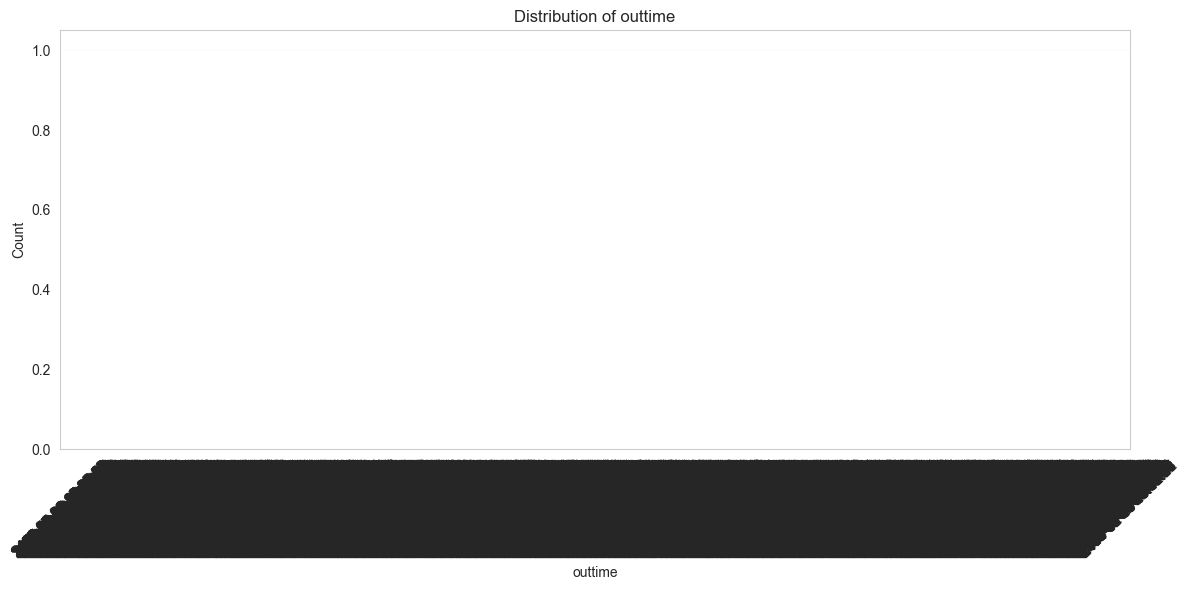


Frequency Table for outtime:
                     Count  Percentage
outtime                               
2166-01-30 16:35:15      1    0.005909
2161-10-01 17:33:33      1    0.005909
2130-12-23 17:02:38      1    0.005909
2114-04-24 18:25:13      1    0.005909
2157-10-04 14:16:46      1    0.005909
...                    ...         ...
2147-02-12 00:34:15      1    0.005909
2192-07-18 22:00:33      1    0.005909
2130-08-21 21:02:55      1    0.005909
2177-10-21 20:47:56      1    0.005909
2134-05-01 18:06:07      1    0.005909

[16922 rows x 2 columns]


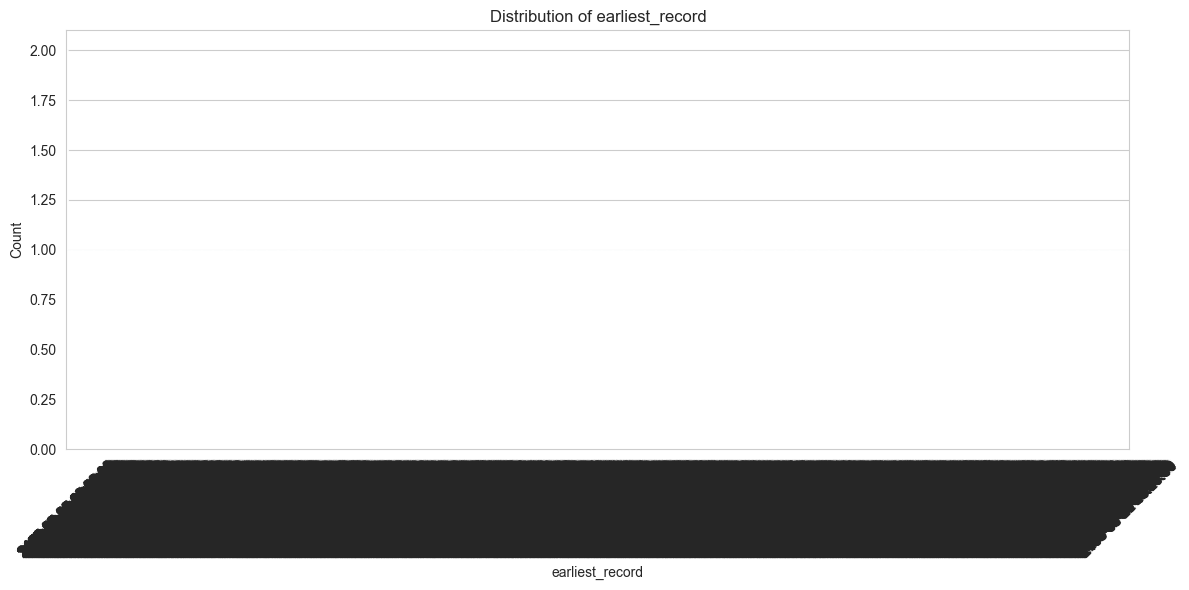


Frequency Table for earliest_record:
                     Count  Percentage
earliest_record                       
2141-12-04 00:00:00      2    0.011819
2158-04-14 20:00:00      2    0.011819
2129-05-16 00:00:00      2    0.011819
2131-02-18 12:44:00      2    0.011819
2182-08-08 14:59:00      2    0.011819
...                    ...         ...
2149-12-29 08:22:00      1    0.005909
2175-10-12 23:00:00      1    0.005909
2138-10-25 17:33:00      1    0.005909
2188-01-28 16:13:00      1    0.005909
2177-10-20 23:23:00      1    0.005909

[16910 rows x 2 columns]


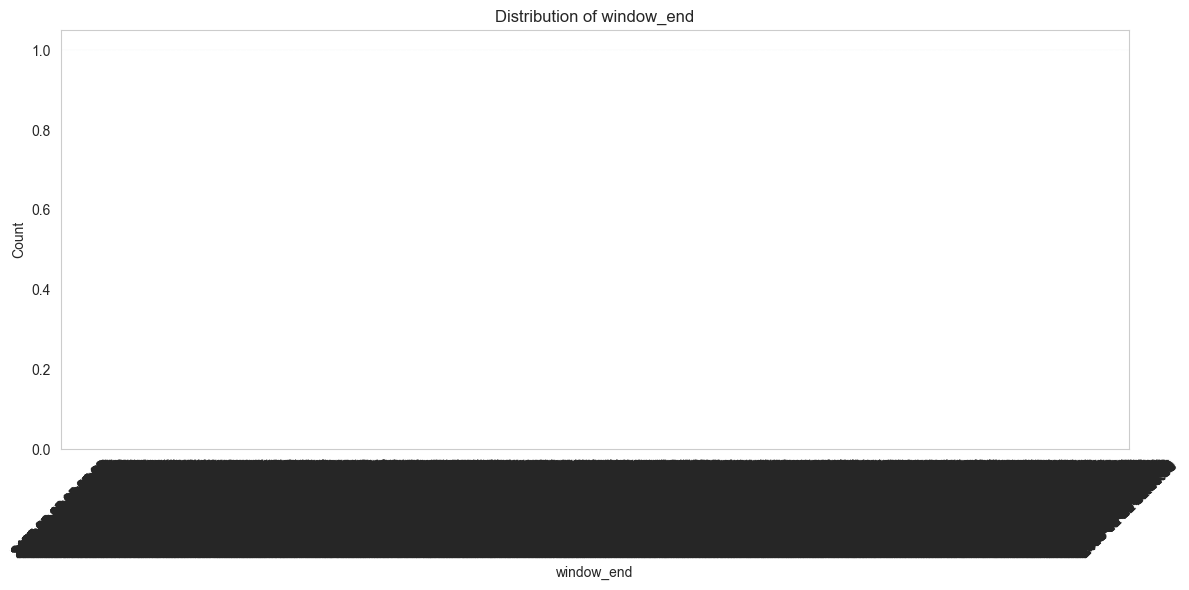


Frequency Table for window_end:
                     Count  Percentage
window_end                            
2166-01-25 15:26:28      1    0.005909
2161-09-30 16:00:53      1    0.005909
2130-12-17 18:45:00      1    0.005909
2114-04-15 05:24:00      1    0.005909
2157-09-23 20:49:34      1    0.005909
...                    ...         ...
2147-02-11 02:59:43      1    0.005909
2192-07-18 02:14:38      1    0.005909
2130-08-19 06:25:00      1    0.005909
2177-10-21 05:56:15      1    0.005909
2134-04-29 15:29:01      1    0.005909

[16922 rows x 2 columns]


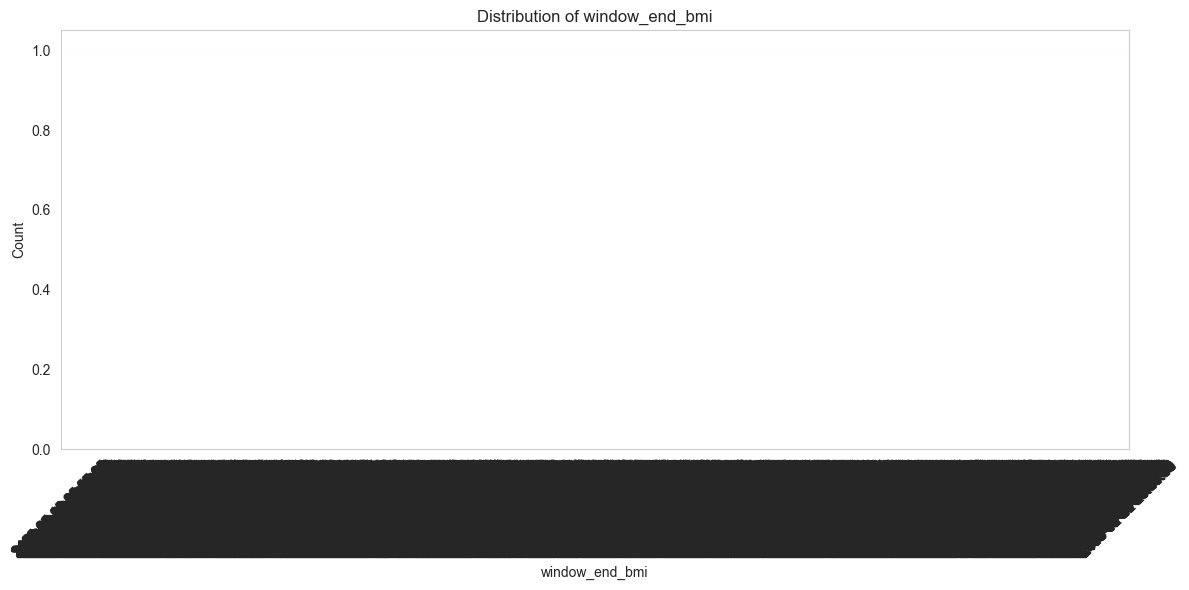


Frequency Table for window_end_bmi:
                     Count  Percentage
window_end_bmi                        
2166-01-26 09:26:28      1    0.005909
2161-10-01 10:00:53      1    0.005909
2130-12-18 12:45:00      1    0.005909
2114-04-15 23:24:00      1    0.005909
2157-09-24 14:49:34      1    0.005909
...                    ...         ...
2147-02-11 20:59:43      1    0.005909
2192-07-18 20:14:38      1    0.005909
2130-08-20 00:25:00      1    0.005909
2177-10-21 23:56:15      1    0.005909
2134-04-30 09:29:01      1    0.005909

[16922 rows x 2 columns]


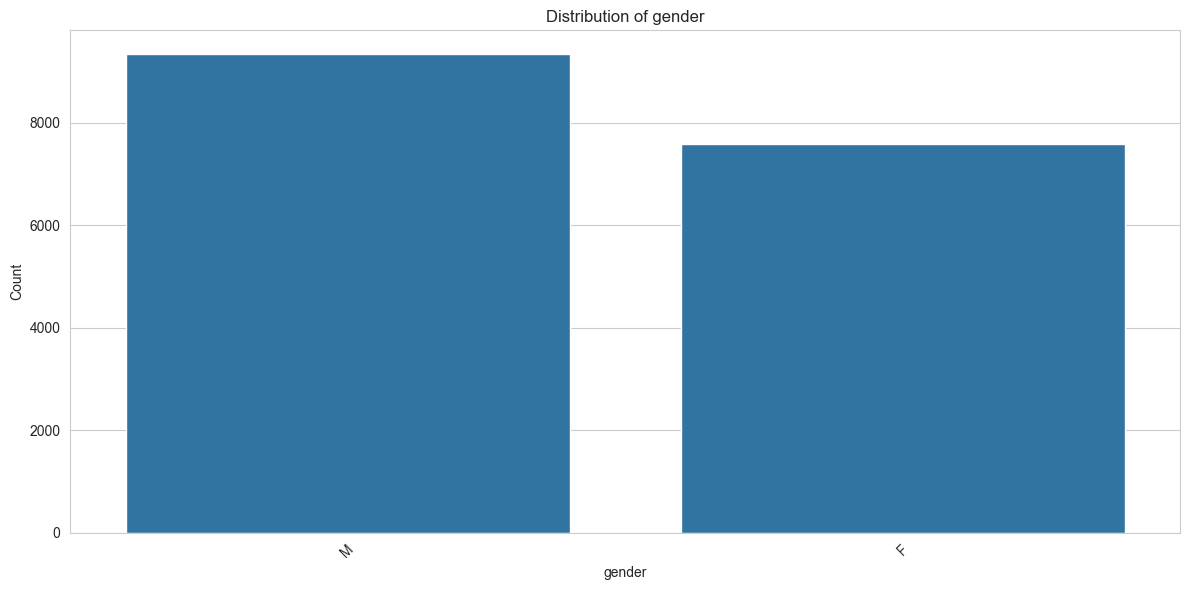


Frequency Table for gender:
        Count  Percentage
gender                   
M        9335   55.164874
F        7587   44.835126


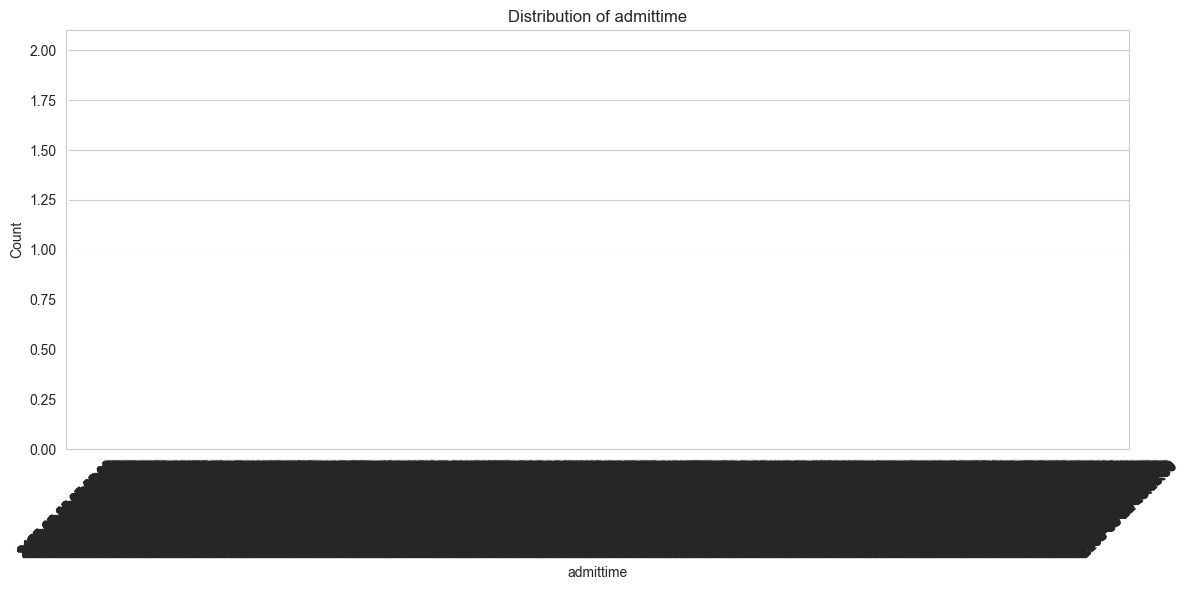


Frequency Table for admittime:
                     Count  Percentage
admittime                             
2152-11-25 00:00:00      2    0.011819
2175-10-30 17:44:00      2    0.011819
2134-12-31 20:32:00      2    0.011819
2185-02-15 07:15:00      2    0.011819
2171-09-26 00:00:00      2    0.011819
...                    ...         ...
2149-12-27 22:57:00      1    0.005909
2175-10-08 19:37:00      1    0.005909
2138-10-25 18:36:00      1    0.005909
2188-01-28 16:12:00      1    0.005909
2177-10-20 23:15:00      1    0.005909

[16910 rows x 2 columns]


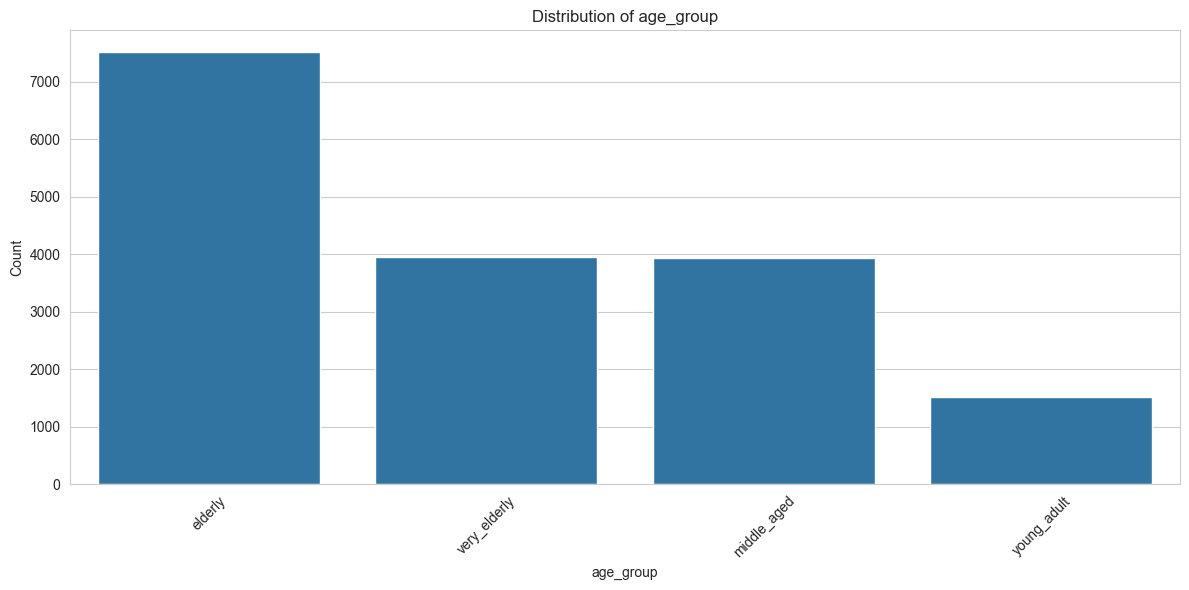


Frequency Table for age_group:
              Count  Percentage
age_group                      
elderly        7513   44.397825
very_elderly   3959   23.395580
middle_aged    3940   23.283300
young_adult    1510    8.923295


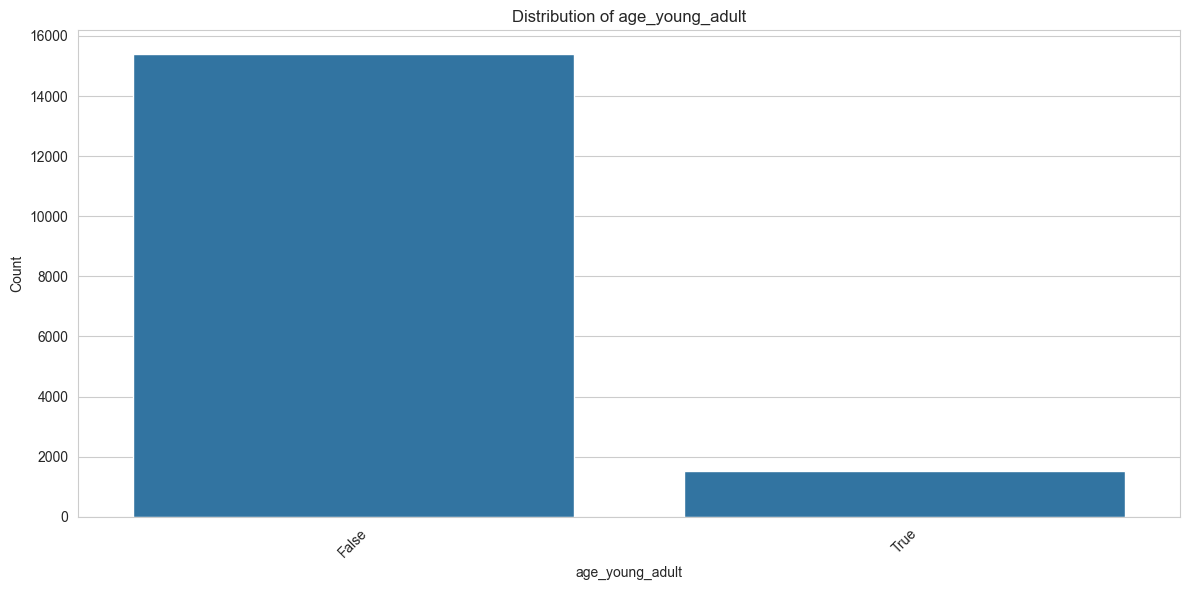


Frequency Table for age_young_adult:
                 Count  Percentage
age_young_adult                   
False            15412   91.076705
True              1510    8.923295


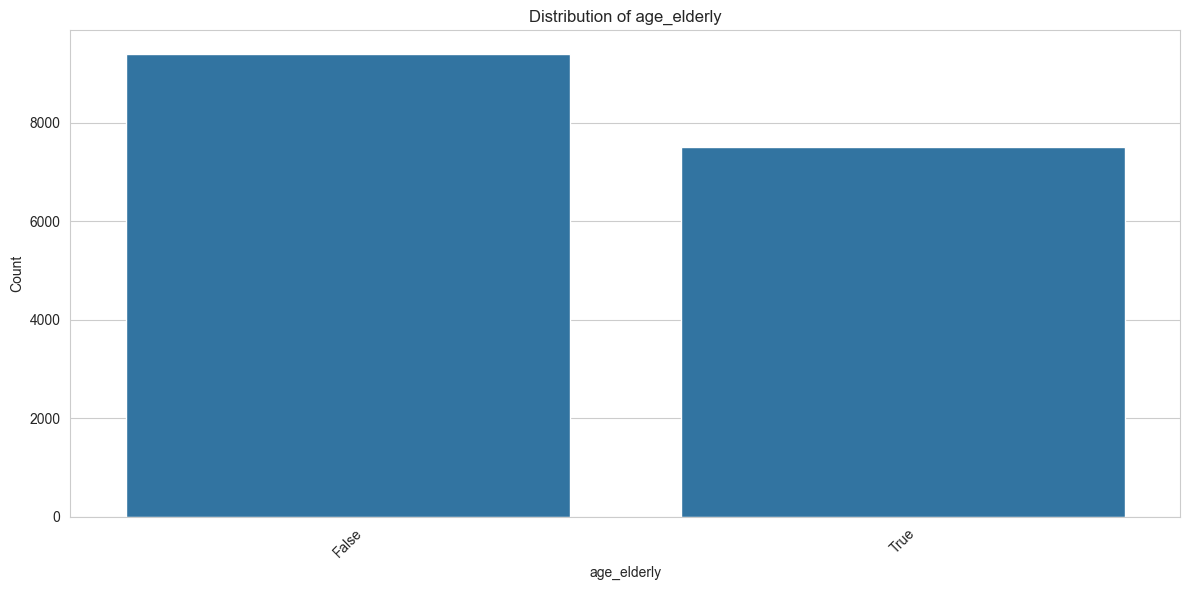


Frequency Table for age_elderly:
             Count  Percentage
age_elderly                   
False         9409   55.602175
True          7513   44.397825


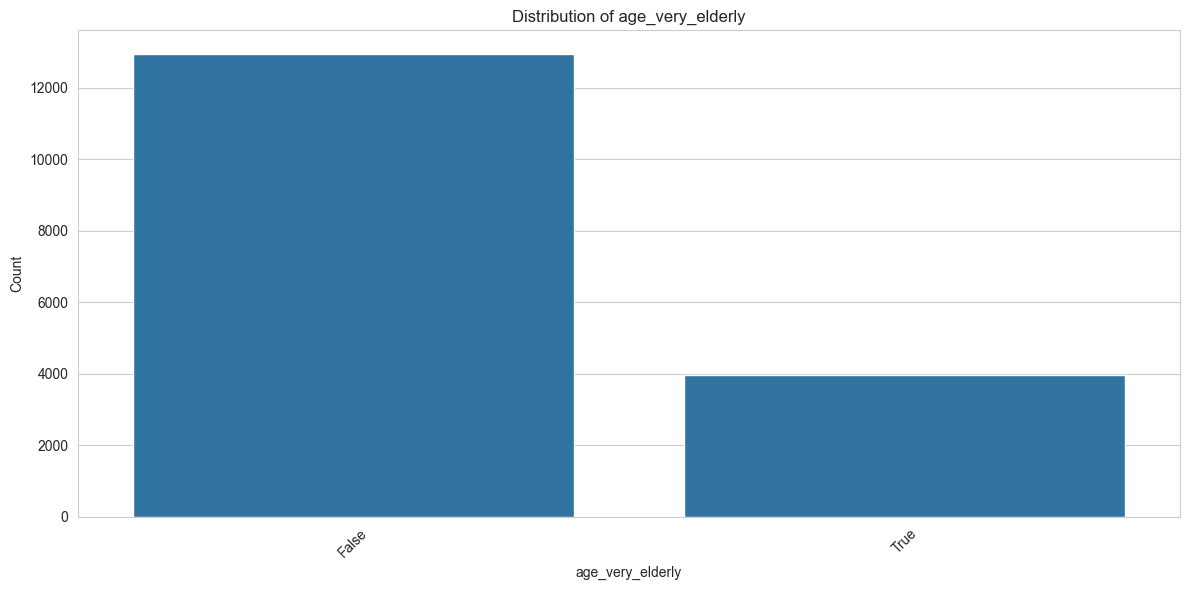


Frequency Table for age_very_elderly:
                  Count  Percentage
age_very_elderly                   
False             12963    76.60442
True               3959    23.39558


In [12]:
# Analysis of categorical variables
if categorical_features:
    for cat_feature in categorical_features:
        plt.figure(figsize=(12, 6))
        value_counts = df[cat_feature].value_counts().sort_values(ascending=False)
        
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Print frequency table
        freq_table = pd.DataFrame({
            'Count': df[cat_feature].value_counts(),
            'Percentage': df[cat_feature].value_counts(normalize=True) * 100
        })
        print(f"\nFrequency Table for {cat_feature}:")
        print(freq_table)
else:
    print("No categorical features to analyze")

## PCA for Numeric Features

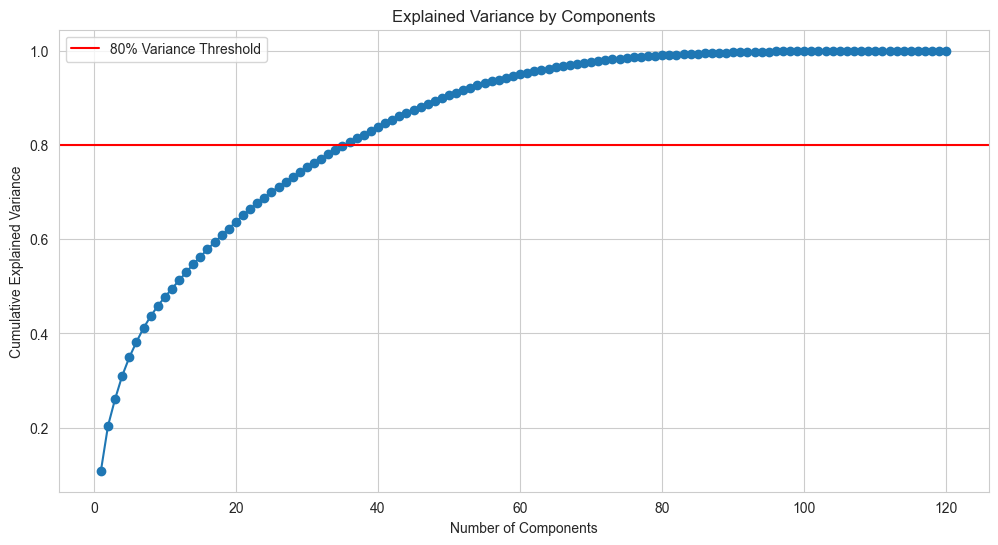

Number of components needed to explain 80% of variance: 36

Top 10 contributing features to PC1:
heart_rate_mean        0.232565
sirs_criteria_count    0.223154
heart_rate_hour_2      0.213479
heart_rate_max         0.213313
heart_rate_hour_3      0.212130
heart_rate_hour_4      0.208420
resp_distress_score    0.206906
has_tachycardia        0.205418
heart_rate_hour_1      0.205355
heart_rate_min         0.204543
dtype: float64

Top 10 contributing features to PC2:
bicarbonate_measured    0.282449
bun_measured            0.282298
creatinine_measured     0.282020
anion_gap_measured      0.275797
wbc_measured            0.273882
hemoglobin_measured     0.273408
platelets_measured      0.271802
hematocrit_measured     0.266690
sodium_measured         0.255716
potassium_measured      0.255565
dtype: float64


In [13]:
# Principal Component Analysis for dimensionality reduction
# Select numeric features with less than 30% missing values
pca_features = [col for col in numeric_features 
                if df[col].isnull().mean() < 0.3 and 'id' not in col.lower()]

# Fill missing values with median for PCA
df_pca = df[pca_features].fillna(df[pca_features].median())

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Plot explained variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.axhline(y=0.8, color='r', linestyle='-', label='80% Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Calculate number of components for 80% variance
n_components_80 = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.8)[0][0] + 1
print(f"Number of components needed to explain 80% of variance: {n_components_80}")

# Show top feature contributions to first two principal components
pca_components = pd.DataFrame(
    abs(pca.components_[:2, :]),
    columns=pca_features
)

print("\nTop 10 contributing features to PC1:")
pc1_contributions = pd.Series(abs(pca.components_[0]), index=pca_features).sort_values(ascending=False)
print(pc1_contributions.head(10))

print("\nTop 10 contributing features to PC2:")
pc2_contributions = pd.Series(abs(pca.components_[1]), index=pca_features).sort_values(ascending=False)
print(pc2_contributions.head(10))

## Patient Cohort Characteristics Summary

In [14]:
# Patient cohort characteristics - summary table
# Create a table of key clinical indicators

# Function to calculate normal ranges
def in_normal_range(series, low, high):
    """Calculate percentage of values within normal range"""
    if series.isnull().all():
        return np.nan
    return ((series >= low) & (series <= high)).mean() * 100

# Define key metrics and their normal ranges
metrics = {
    'heart_rate_mean': [60, 100],  # bpm
    'resp_rate_mean': [12, 20],    # breaths per minute
    'sbp_mean': [90, 140],         # mmHg
    'dbp_mean': [60, 90],          # mmHg
    'spo2_mean': [95, 100],        # %
    'temp_mean': [36.5, 37.5],     # Celsius
    'glucose_mean': [70, 140],     # mg/dL
    'creatinine_mean': [0.7, 1.3], # mg/dL
    'sodium_mean': [135, 145],     # mEq/L
    'potassium_mean': [3.5, 5.0],  # mEq/L
    'bmi': [18.5, 25],             # kg/m^2
}

# Collect rows in a list
rows = []
for metric, normal_range in metrics.items():
    if metric in df.columns:
        row = {
            'Metric': metric,
            'Mean': df[metric].mean(),
            'Median': df[metric].median(),
            'Within Normal Range (%)': in_normal_range(df[metric], normal_range[0], normal_range[1]),
            'Missing (%)': df[metric].isnull().mean() * 100
        }
        rows.append(row)

clinical_summary = pd.DataFrame(rows, columns=['Metric', 'Mean', 'Median', 'Within Normal Range (%)', 'Missing (%)'])
clinical_summary.sort_values('Within Normal Range (%)', ascending=True)

Metric        Mean      Median  Within Normal Range (%)  \
5         temp_mean   94.040081   98.100000                 0.975062   
6      glucose_mean  150.330725  130.000000                31.089706   
7   creatinine_mean    1.280518    0.900000                37.921050   
8       sodium_mean  138.352027  139.000000                47.494386   
9    potassium_mean    4.181723    4.100000                47.908049   
3          dbp_mean   69.692665   66.250000                49.013119   
1    resp_rate_mean   18.978985   18.279175                60.849781   
2          sbp_mean  123.706260  119.290102                61.458456   
0   heart_rate_mean   85.624280   83.392857                71.079069   
4         spo2_mean   97.239254   97.666667                80.274199   
10              bmi         NaN         NaN                      NaN   

    Missing (%)  
5      7.983690  
6     45.059686  
7     35.279518  
8     39.032029  
9     38.831107  
3     20.943151  
1      3.486586  
2     20.937241  
0      3.102470  
4      3.433400  
10   100.000000

## Group Analysis

Mean                  Median                 Std Dev  \
Gender               Female        Male      Female        Male      Female   
Metric                                                                        
age               68.097403   65.262667   71.000000   67.000000   17.047927   
creatinine_mean    1.137265    1.392248    0.800000    1.000000    1.187827   
dbp_mean          67.160620   71.918162   64.504989   67.805000  104.958405   
glucose_mean     150.860858  149.879447  132.000000  129.000000   72.753502   
heart_rate_mean   86.184403   85.161647   84.079755   82.801563   18.402362   
hemoglobin_mean   10.369532   11.034578   10.300000   11.000000    1.999911   
sbp_mean         120.675410  126.369799  118.494809  120.000000   21.151156   

                             
Gender                 Male  
Metric                       
age               16.427797  
creatinine_mean    1.382564  
dbp_mean         266.614336  
glucose_mean      78.850542  
heart_rate_mean   18.432821  
hemoglobin_mean    2.272296  
sbp_mean         409.367705

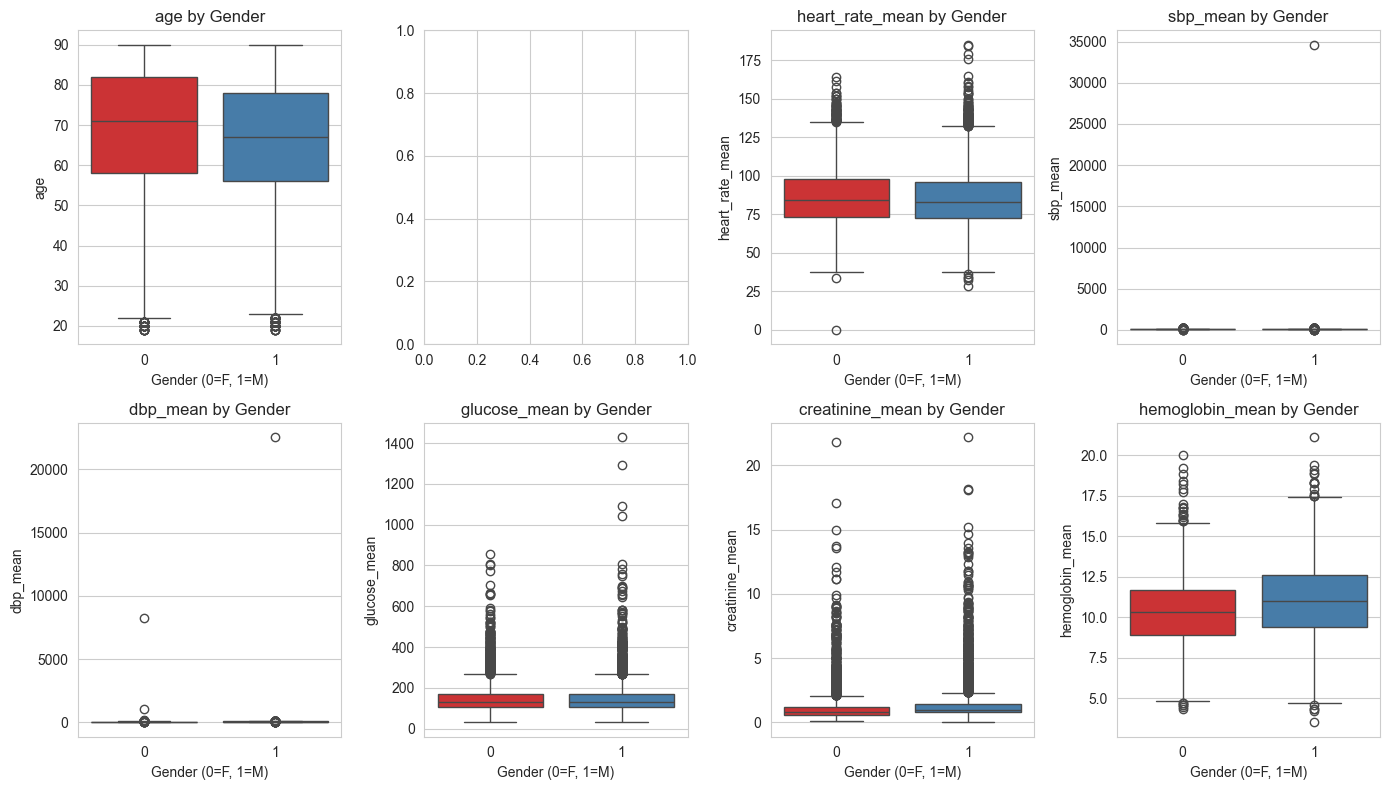

In [15]:
# Group analysis - compare different patient groups if possible
if 'gender_numeric' in df.columns:
    gender_groups = {0: 'Female', 1: 'Male'}
    
    # Compare key metrics by gender
    key_metrics = ['age', 'bmi', 'heart_rate_mean', 'sbp_mean', 'dbp_mean', 
                  'glucose_mean', 'creatinine_mean', 'hemoglobin_mean']
    key_metrics = [m for m in key_metrics if m in df.columns]
    
    # Collect rows in a list
    rows = []
    for metric in key_metrics:
        for gender_code, gender_name in gender_groups.items():
            # Handle missing columns gracefully
            if metric in df.columns:
                row = {
                    'Metric': metric,
                    'Gender': gender_name,
                    'Mean': df[df['gender_numeric'] == gender_code][metric].mean(),
                    'Median': df[df['gender_numeric'] == gender_code][metric].median(),
                    'Std Dev': df[df['gender_numeric'] == gender_code][metric].std(),
                }
                rows.append(row)
    
    # Create DataFrame from rows
    comparison_table = pd.DataFrame(rows)
    
    # Reshape for easier comparison
    if not comparison_table.empty:
        comparison_pivot = comparison_table.pivot_table(
            index='Metric', 
            columns='Gender', 
            values=['Mean', 'Median', 'Std Dev']
        )
        display(comparison_pivot)
    else:
        print("No valid metrics found for group comparison.")
    
    # Visualize differences
    if key_metrics:
        plt.figure(figsize=(14, 8))
        for i, metric in enumerate(key_metrics):
            if metric in df.columns:
                plt.subplot(2, 4, i+1)
                # Only plot if there are non-null values
                if df[metric].notnull().any():
                    sns.boxplot(x='gender_numeric', y=metric, data=df, palette='Set1')
                    plt.title(f'{metric} by Gender')
                    plt.xlabel('Gender (0=F, 1=M)')
        plt.tight_layout()
        plt.show()
else:
    print("Gender information not available for group comparison")

Time-based features available: ['intime', 'outtime', 'duration_hours', 'anchor_year', 'admittime', 'admittime_year', 'heart_rate_hour_0', 'heart_rate_hour_1', 'heart_rate_hour_2', 'heart_rate_hour_3', 'heart_rate_hour_4', 'heart_rate_hour_6', 'resp_rate_hour_0', 'resp_rate_hour_1', 'resp_rate_hour_2', 'resp_rate_hour_3', 'resp_rate_hour_4', 'resp_rate_hour_6', 'map_hour_0', 'map_hour_1', 'map_hour_2', 'map_hour_3', 'map_hour_4', 'map_hour_6', 'temp_hour_0', 'temp_hour_1', 'temp_hour_2', 'temp_hour_3', 'temp_hour_4', 'temp_hour_6', 'sbp_hour_0', 'sbp_hour_1', 'sbp_hour_2', 'sbp_hour_3', 'sbp_hour_4', 'sbp_hour_6', 'dbp_hour_0', 'dbp_hour_1', 'dbp_hour_2', 'dbp_hour_3', 'dbp_hour_4', 'dbp_hour_6', 'spo2_hour_0', 'spo2_hour_1', 'spo2_hour_2', 'spo2_hour_3', 'spo2_hour_4', 'spo2_hour_6', 'bun_hour_0', 'bun_hour_1', 'bun_hour_2', 'bun_hour_3', 'bun_hour_4', 'bun_hour_6', 'alkaline_phosphatase_hour_0', 'alkaline_phosphatase_hour_1', 'alkaline_phosphatase_hour_2', 'alkaline_phosphatase_hour_3

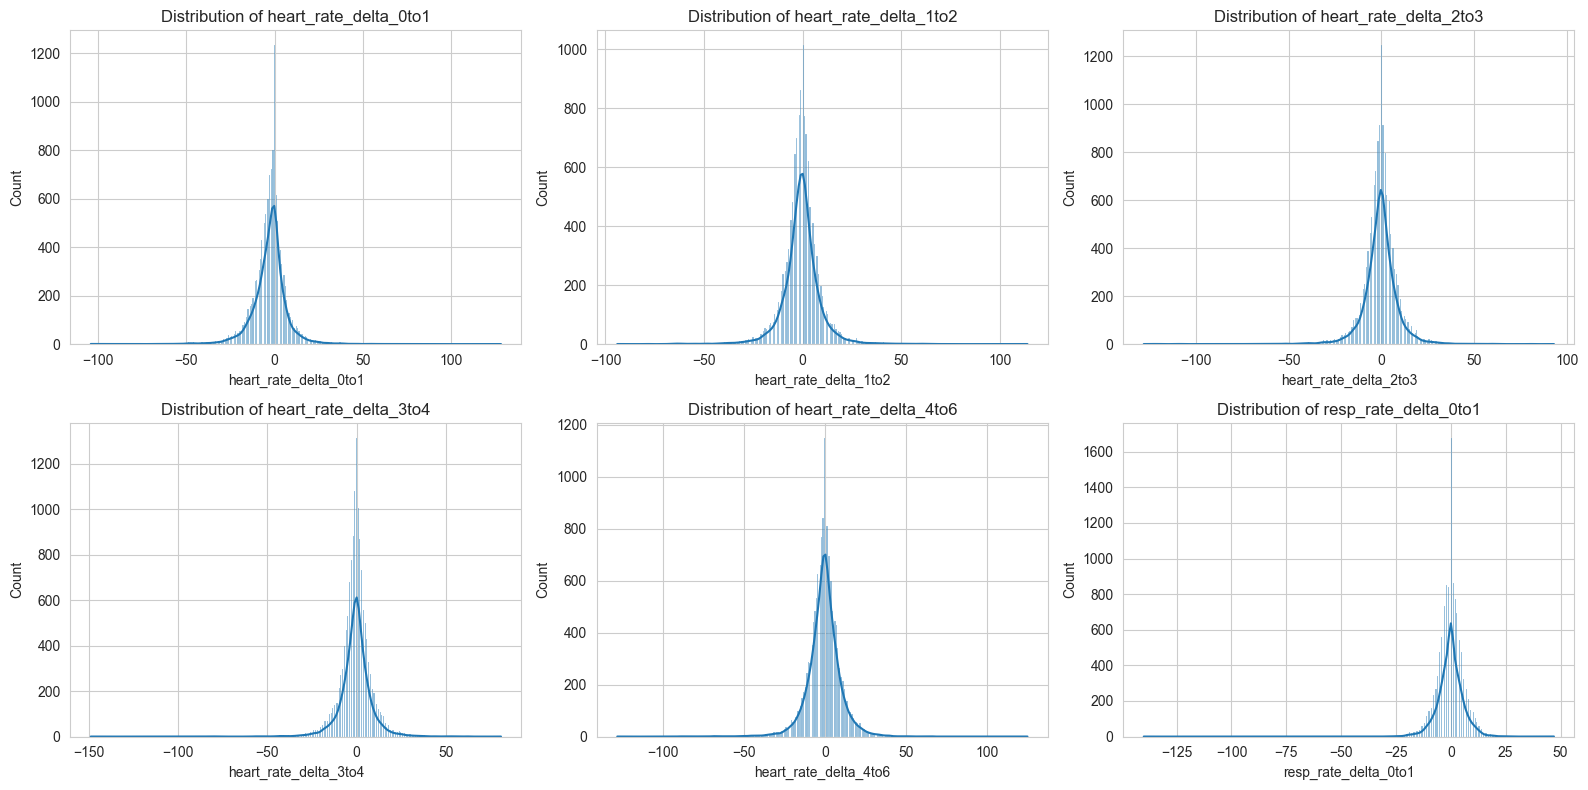

In [16]:
# Temporal analysis if time-based features exist
time_features = [col for col in df.columns if any(x in col.lower() for x in ['time', 'date', 'hour', 'day', 'month', 'year'])]

if time_features:
    print(f"Time-based features available: {time_features}")
    # Code to analyze temporal patterns would go here
else:
    print("No explicit time-based features available in the dataset")
    
# Look for delta features that represent changes over time
delta_features = [col for col in df.columns if 'delta' in col.lower()]
if delta_features:
    print(f"Found {len(delta_features)} delta features that represent changes over time:")
    print(delta_features[:10])
    
    # Analyze delta features - plot histograms of top ones
    plt.figure(figsize=(16, 8))
    for i, feature in enumerate(delta_features[:6]):
        plt.subplot(2, 3, i+1)
        sns.histplot(df[feature].dropna(), kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

## Time Features Analysis

Analyzing individual time window features...
Found 132 time window features

----- VITAL SIGN ANALYSIS BY HOUR -----

HEART_RATE:
  Hour 0: 29.5% missing, |correlation| with mortality: 0.0897
  Hour 1: 25.0% missing, |correlation| with mortality: 0.0836
  Hour 2: 17.5% missing, |correlation| with mortality: 0.0928
  Hour 3: 13.5% missing, |correlation| with mortality: 0.0883
  Hour 4: 11.0% missing, |correlation| with mortality: 0.0847
  Hour 6: 6.8% missing, |correlation| with mortality: 0.1009
  Best hour: 6 (|correlation|: 0.1009)


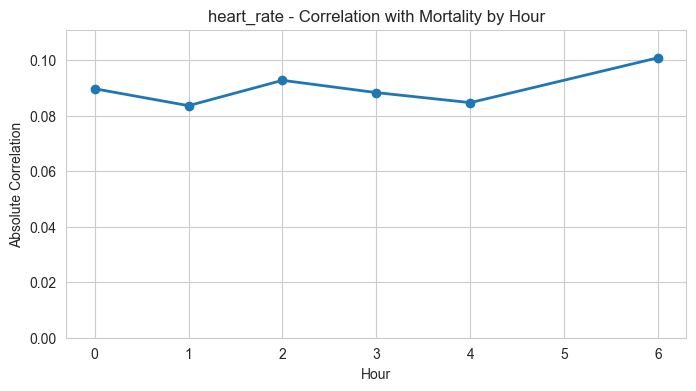


RESP_RATE:
  Hour 0: 29.9% missing, |correlation| with mortality: 0.1075
  Hour 1: 25.6% missing, |correlation| with mortality: 0.1216
  Hour 2: 18.1% missing, |correlation| with mortality: 0.1156
  Hour 3: 14.2% missing, |correlation| with mortality: 0.1273
  Hour 4: 11.8% missing, |correlation| with mortality: 0.1235
  Hour 6: 7.6% missing, |correlation| with mortality: 0.1209
  Best hour: 3 (|correlation|: 0.1273)


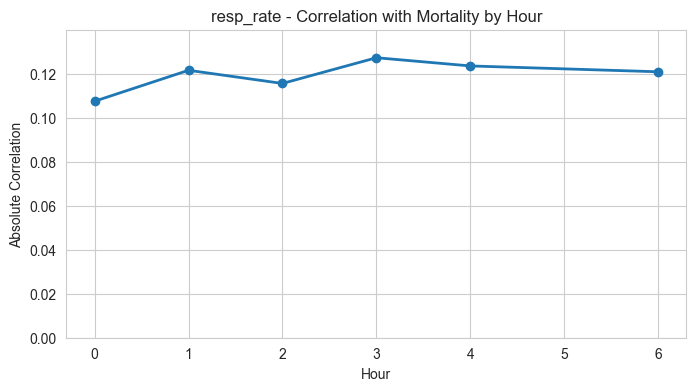


MAP:
  Hour 0: 89.2% missing, |correlation| with mortality: 0.0043
  Hour 1: 87.3% missing, |correlation| with mortality: 0.0263
  Hour 2: 83.3% missing, |correlation| with mortality: 0.0095
  Hour 3: 79.8% missing, |correlation| with mortality: 0.0155
  Hour 4: 76.9% missing, |correlation| with mortality: 0.0102
  Hour 6: 71.6% missing, |correlation| with mortality: 0.0262
  Best hour: 1 (|correlation|: 0.0263)


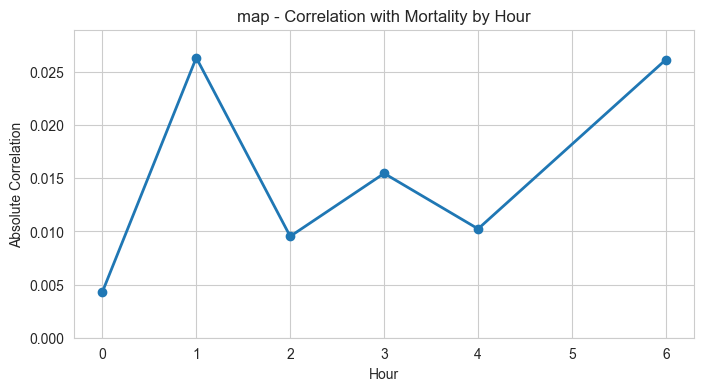


TEMP:
  Hour 0: 36.1% missing, |correlation| with mortality: 0.0896
  Hour 1: 73.4% missing, |correlation| with mortality: 0.0744
  Hour 2: 76.5% missing, |correlation| with mortality: 0.0333
  Hour 3: 73.2% missing, |correlation| with mortality: 0.0176
  Hour 4: 70.0% missing, |correlation| with mortality: 0.0066
  Hour 6: 69.6% missing, |correlation| with mortality: 0.0314
  Best hour: 0 (|correlation|: 0.0896)


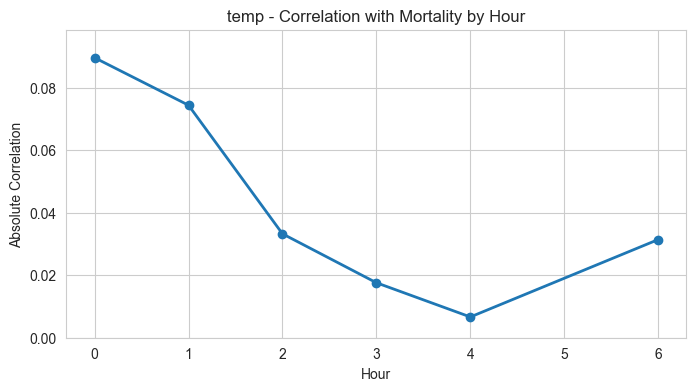


SBP:
  Hour 0: 37.4% missing, |correlation| with mortality: 0.0412
  Hour 1: 37.0% missing, |correlation| with mortality: 0.0518
  Hour 2: 33.3% missing, |correlation| with mortality: 0.0559
  Hour 3: 33.3% missing, |correlation| with mortality: 0.0527
  Hour 4: 33.8% missing, |correlation| with mortality: 0.0480
  Hour 6: 34.8% missing, |correlation| with mortality: 0.0392
  Best hour: 2 (|correlation|: 0.0559)


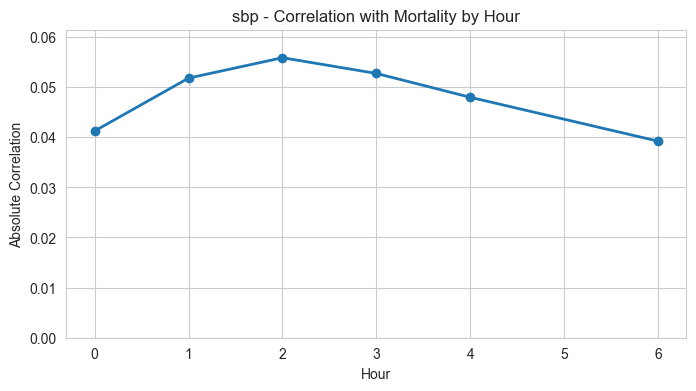


DBP:
  Hour 0: 37.4% missing, |correlation| with mortality: 0.0346
  Hour 1: 37.0% missing, |correlation| with mortality: 0.0669
  Hour 2: 33.4% missing, |correlation| with mortality: 0.0616
  Hour 3: 33.3% missing, |correlation| with mortality: 0.0048
  Hour 4: 33.8% missing, |correlation| with mortality: 0.0461
  Hour 6: 34.8% missing, |correlation| with mortality: 0.0068
  Best hour: 1 (|correlation|: 0.0669)


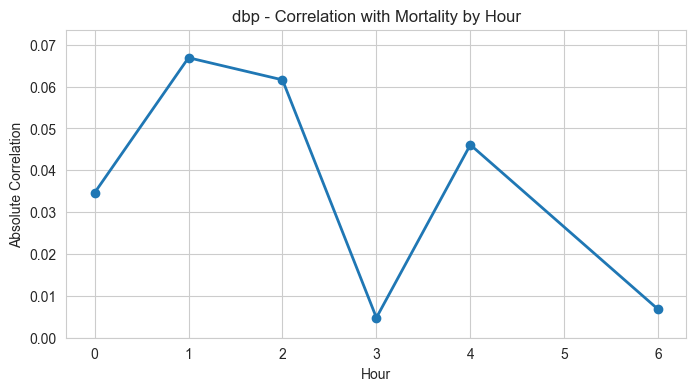


SPO2:
  Hour 0: 30.4% missing, |correlation| with mortality: 0.0107
  Hour 1: 26.2% missing, |correlation| with mortality: 0.0482
  Hour 2: 18.7% missing, |correlation| with mortality: 0.0727
  Hour 3: 15.0% missing, |correlation| with mortality: 0.0716
  Hour 4: 12.3% missing, |correlation| with mortality: 0.0664
  Hour 6: 8.2% missing, |correlation| with mortality: 0.0715
  Best hour: 2 (|correlation|: 0.0727)


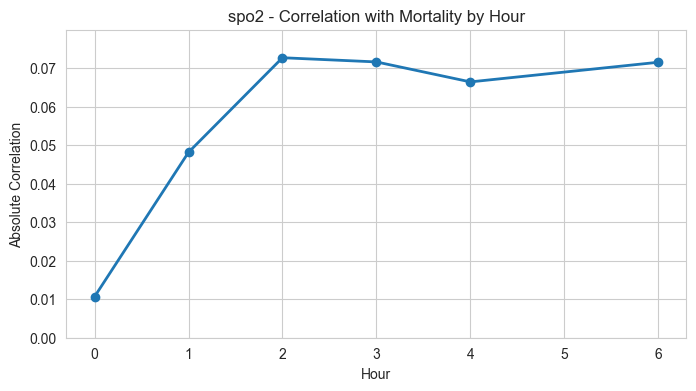


BUN:
  Hour 0: 58.1% missing, |correlation| with mortality: 0.1589
  Hour 1: 83.7% missing, |correlation| with mortality: 0.0883
  Hour 2: 87.9% missing, |correlation| with mortality: 0.0543
  Hour 3: 89.8% missing, |correlation| with mortality: 0.0529
  Hour 4: 90.5% missing, |correlation| with mortality: 0.0253
  Hour 6: 90.3% missing, |correlation| with mortality: 0.0513
  Best hour: 0 (|correlation|: 0.1589)


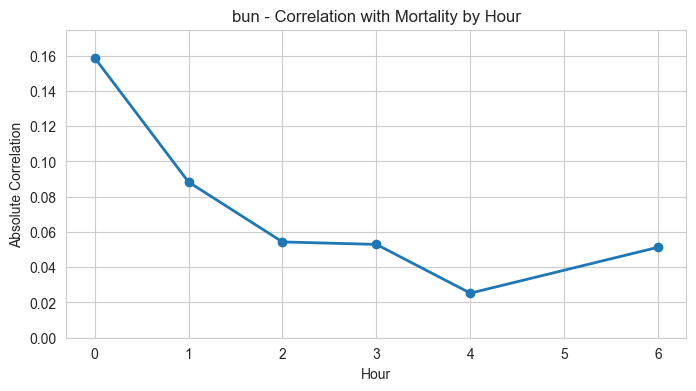


ALKALINE_PHOSPHATASE:
  Hour 0: 75.8% missing, |correlation| with mortality: 0.0983
  Hour 1: 93.1% missing, |correlation| with mortality: 0.0346
  Hour 2: 95.9% missing, |correlation| with mortality: 0.0363
  Hour 3: 97.2% missing, |correlation| with mortality: 0.0393
  Hour 4: 97.6% missing, |correlation| with mortality: 0.0218
  Hour 6: 97.3% missing, |correlation| with mortality: 0.0093
  Best hour: 0 (|correlation|: 0.0983)


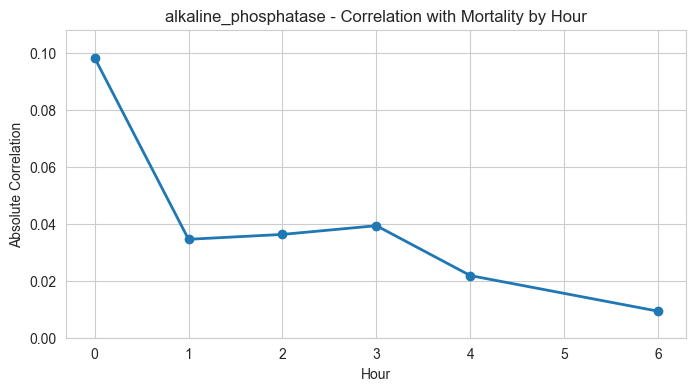


BILIRUBIN:
  Hour 0: 75.9% missing, |correlation| with mortality: 0.0956
  Hour 1: 93.1% missing, |correlation| with mortality: 0.0414
  Hour 2: 96.0% missing, |correlation| with mortality: 0.0314
  Hour 3: 97.2% missing, |correlation| with mortality: 0.0333
  Hour 4: 97.6% missing, |correlation| with mortality: 0.0248
  Hour 6: 97.3% missing, |correlation| with mortality: 0.0237
  Best hour: 0 (|correlation|: 0.0956)


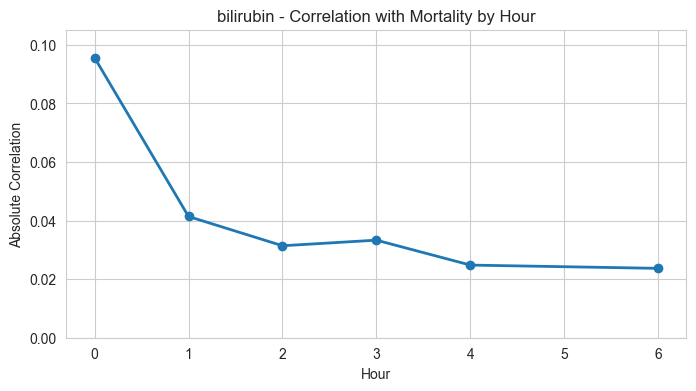


CREATININE:
  Hour 0: 58.2% missing, |correlation| with mortality: 0.0693
  Hour 1: 83.7% missing, |correlation| with mortality: 0.0610
  Hour 2: 87.9% missing, |correlation| with mortality: 0.0222
  Hour 3: 89.7% missing, |correlation| with mortality: 0.0192
  Hour 4: 90.4% missing, |correlation| with mortality: 0.0070
  Hour 6: 90.2% missing, |correlation| with mortality: 0.0112
  Best hour: 0 (|correlation|: 0.0693)


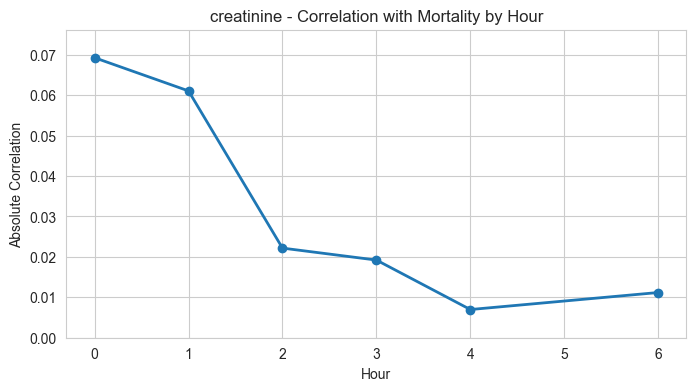


GLUCOSE:
  Hour 0: 59.0% missing, |correlation| with mortality: 0.0644
  Hour 1: 84.6% missing, |correlation| with mortality: 0.0656
  Hour 2: 89.7% missing, |correlation| with mortality: 0.0429
  Hour 3: 91.9% missing, |correlation| with mortality: 0.0243
  Hour 4: 92.4% missing, |correlation| with mortality: 0.0361
  Hour 6: 92.0% missing, |correlation| with mortality: 0.0414
  Best hour: 1 (|correlation|: 0.0656)


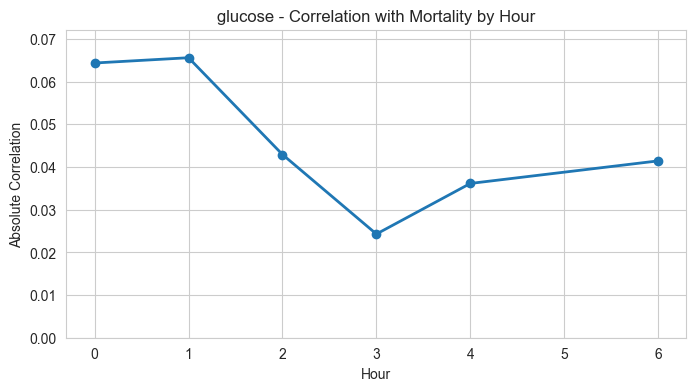


PLATELETS:
  Hour 0: 57.5% missing, |correlation| with mortality: 0.0026
  Hour 1: 82.4% missing, |correlation| with mortality: 0.0132
  Hour 2: 86.3% missing, |correlation| with mortality: 0.0168
  Hour 3: 88.0% missing, |correlation| with mortality: 0.0151
  Hour 4: 88.8% missing, |correlation| with mortality: 0.0140
  Hour 6: 89.6% missing, |correlation| with mortality: 0.0007
  Best hour: 2 (|correlation|: 0.0168)


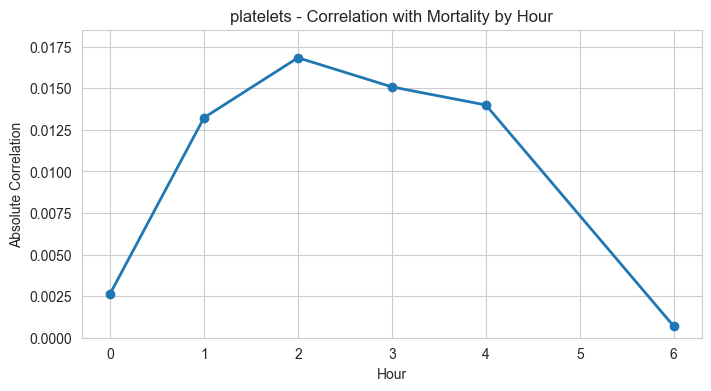


HEMOGLOBIN:
  Hour 0: 57.6% missing, |correlation| with mortality: 0.0856
  Hour 1: 82.5% missing, |correlation| with mortality: 0.0208
  Hour 2: 86.5% missing, |correlation| with mortality: 0.0180
  Hour 3: 88.1% missing, |correlation| with mortality: 0.0033
  Hour 4: 89.0% missing, |correlation| with mortality: 0.0071
  Hour 6: 89.8% missing, |correlation| with mortality: 0.0155
  Best hour: 0 (|correlation|: 0.0856)


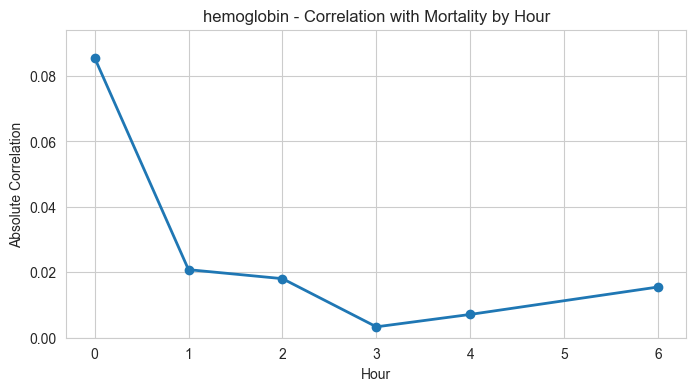


WBC:
  Hour 0: 57.6% missing, |correlation| with mortality: 0.0688
  Hour 1: 82.5% missing, |correlation| with mortality: 0.0356
  Hour 2: 86.5% missing, |correlation| with mortality: 0.0256
  Hour 3: 88.1% missing, |correlation| with mortality: 0.0101
  Hour 4: 89.1% missing, |correlation| with mortality: 0.0128
  Hour 6: 89.9% missing, |correlation| with mortality: 0.0117
  Best hour: 0 (|correlation|: 0.0688)


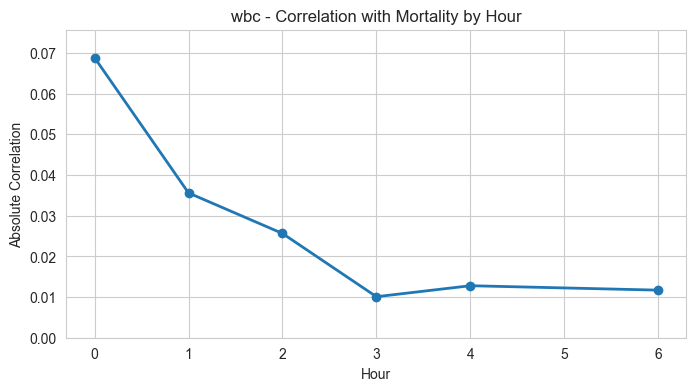


SODIUM:
  Hour 0: 58.7% missing, |correlation| with mortality: 0.0331
  Hour 1: 84.0% missing, |correlation| with mortality: 0.0143
  Hour 2: 88.7% missing, |correlation| with mortality: 0.0030
  Hour 3: 90.5% missing, |correlation| with mortality: 0.0013
  Hour 4: 91.1% missing, |correlation| with mortality: 0.0223
  Hour 6: 90.4% missing, |correlation| with mortality: 0.0088
  Best hour: 0 (|correlation|: 0.0331)


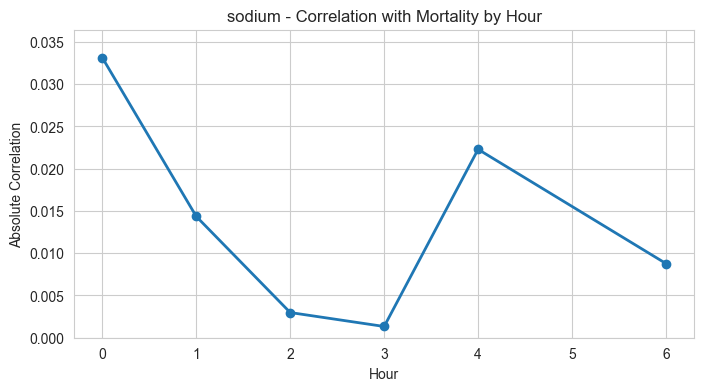


POTASSIUM:
  Hour 0: 58.6% missing, |correlation| with mortality: 0.0414
  Hour 1: 84.0% missing, |correlation| with mortality: 0.0296
  Hour 2: 88.6% missing, |correlation| with mortality: 0.0194
  Hour 3: 90.5% missing, |correlation| with mortality: 0.0183
  Hour 4: 91.1% missing, |correlation| with mortality: 0.0140
  Hour 6: 90.2% missing, |correlation| with mortality: 0.0184
  Best hour: 0 (|correlation|: 0.0414)


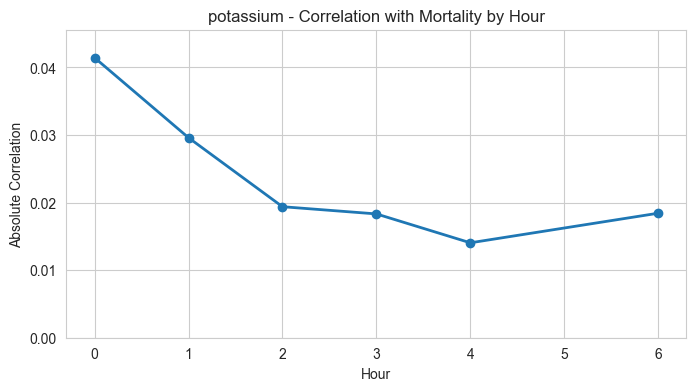


LACTATE:
  Hour 0: 66.6% missing, |correlation| with mortality: 0.1611
  Hour 1: 85.0% missing, |correlation| with mortality: 0.1406
  Hour 2: 87.9% missing, |correlation| with mortality: 0.1131
  Hour 3: 89.5% missing, |correlation| with mortality: 0.1029
  Hour 4: 90.6% missing, |correlation| with mortality: 0.0947
  Hour 6: 92.1% missing, |correlation| with mortality: 0.1026
  Best hour: 0 (|correlation|: 0.1611)


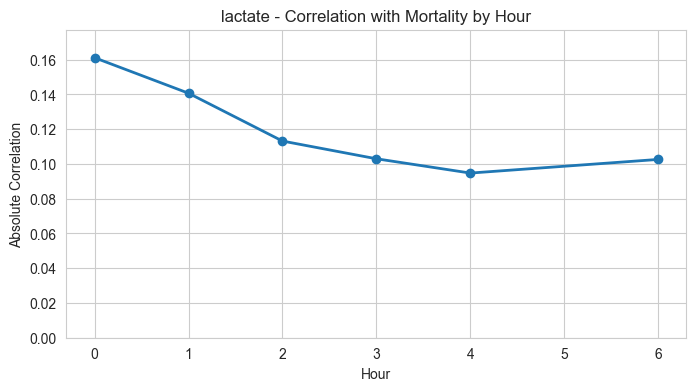


HEMATOCRIT:
  Hour 0: 57.0% missing, |correlation| with mortality: 0.0657
  Hour 1: 81.8% missing, |correlation| with mortality: 0.0039
  Hour 2: 85.9% missing, |correlation| with mortality: 0.0090
  Hour 3: 87.5% missing, |correlation| with mortality: 0.0075
  Hour 4: 88.3% missing, |correlation| with mortality: 0.0011
  Hour 6: 88.3% missing, |correlation| with mortality: 0.0090
  Best hour: 0 (|correlation|: 0.0657)


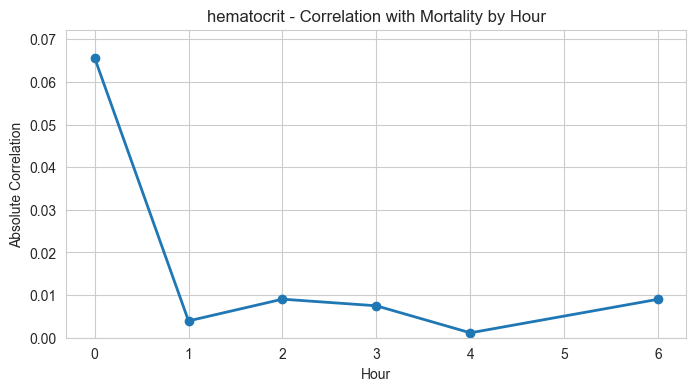


CHLORIDE:
  Hour 0: 58.6% missing, |correlation| with mortality: 0.0400
  Hour 1: 83.6% missing, |correlation| with mortality: 0.0141
  Hour 2: 87.8% missing, |correlation| with mortality: 0.0234
  Hour 3: 89.6% missing, |correlation| with mortality: 0.0361
  Hour 4: 90.3% missing, |correlation| with mortality: 0.0423
  Hour 6: 89.8% missing, |correlation| with mortality: 0.0271
  Best hour: 4 (|correlation|: 0.0423)


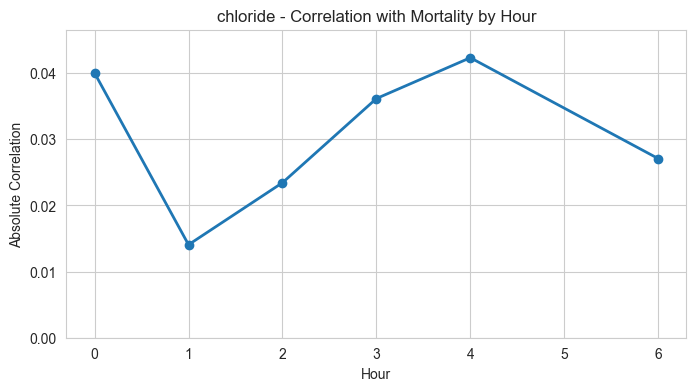


BICARBONATE:
  Hour 0: 58.9% missing, |correlation| with mortality: 0.0931
  Hour 1: 83.8% missing, |correlation| with mortality: 0.0546
  Hour 2: 88.0% missing, |correlation| with mortality: 0.0447
  Hour 3: 89.8% missing, |correlation| with mortality: 0.0302
  Hour 4: 90.5% missing, |correlation| with mortality: 0.0340
  Hour 6: 90.3% missing, |correlation| with mortality: 0.0388
  Best hour: 0 (|correlation|: 0.0931)


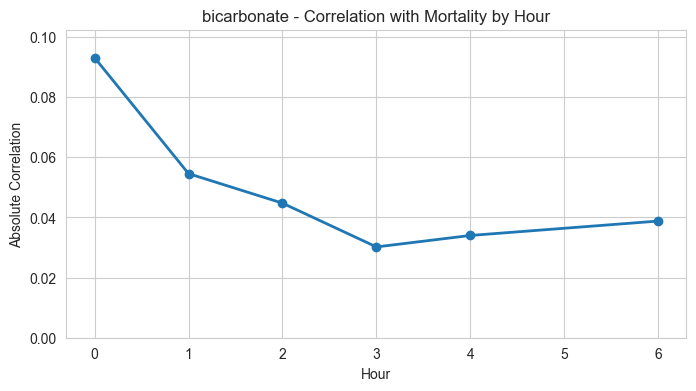


ANION_GAP:
  Hour 0: 58.9% missing, |correlation| with mortality: 0.1345
  Hour 1: 84.0% missing, |correlation| with mortality: 0.0997
  Hour 2: 88.2% missing, |correlation| with mortality: 0.0770
  Hour 3: 90.1% missing, |correlation| with mortality: 0.0773
  Hour 4: 90.7% missing, |correlation| with mortality: 0.0639
  Hour 6: 90.6% missing, |correlation| with mortality: 0.0768
  Best hour: 0 (|correlation|: 0.1345)


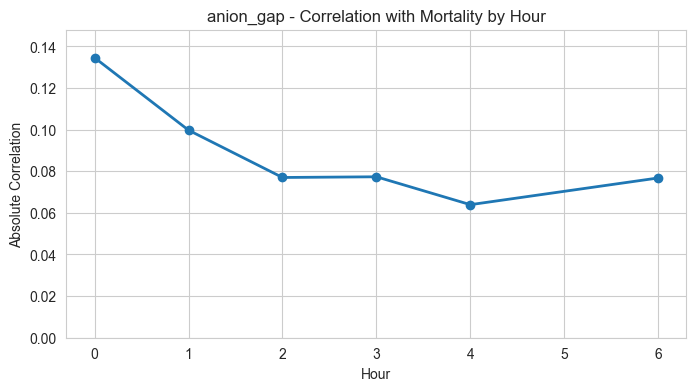


----- TIME POINT ANALYSIS -----
Hour 0: 54.9% avg missing, 0.0723 avg |correlation|, 22 features
Hour 1: 72.0% avg missing, 0.0541 avg |correlation|, 22 features
Hour 2: 73.3% avg missing, 0.0445 avg |correlation|, 22 features
Hour 3: 73.6% avg missing, 0.0386 avg |correlation|, 22 features
Hour 4: 73.5% avg missing, 0.0367 avg |correlation|, 22 features
Hour 6: 72.8% avg missing, 0.0383 avg |correlation|, 22 features


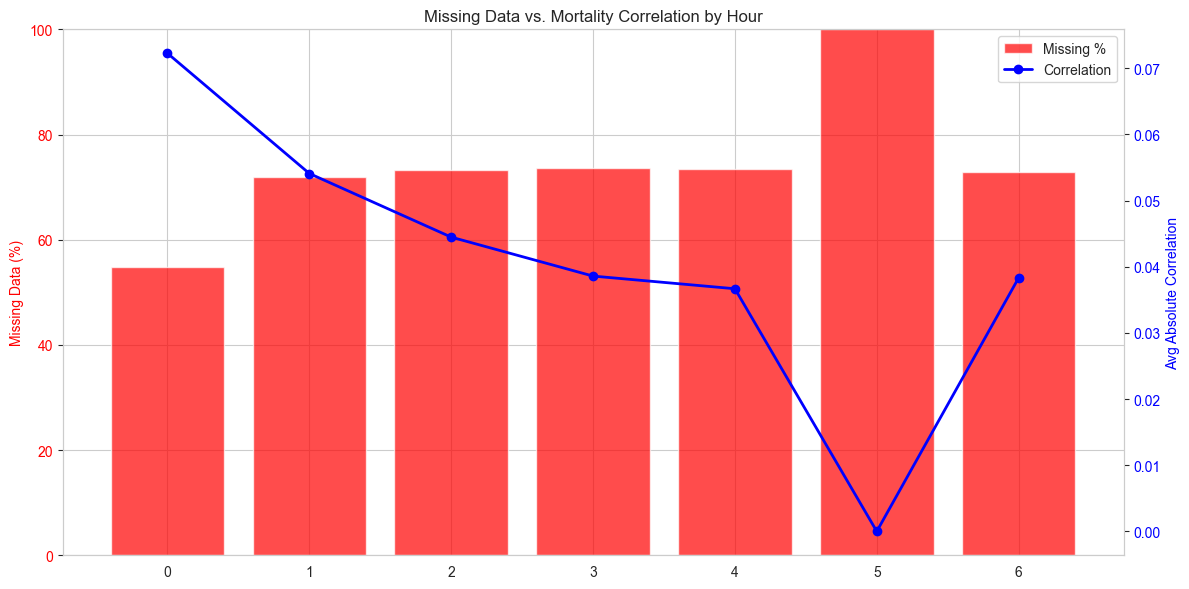


----- VITAL SIGNS RANKED BY MORTALITY PREDICTION POWER -----
resp_rate: Avg |correlation|: 0.1194, Best hour: 3 (|correlation|: 0.1273)
lactate: Avg |correlation|: 0.1192, Best hour: 0 (|correlation|: 0.1611)
heart_rate: Avg |correlation|: 0.0900, Best hour: 6 (|correlation|: 0.1009)
anion_gap: Avg |correlation|: 0.0882, Best hour: 0 (|correlation|: 0.1345)
bun: Avg |correlation|: 0.0719, Best hour: 0 (|correlation|: 0.1589)
spo2: Avg |correlation|: 0.0569, Best hour: 2 (|correlation|: 0.0727)
bicarbonate: Avg |correlation|: 0.0492, Best hour: 0 (|correlation|: 0.0931)
sbp: Avg |correlation|: 0.0481, Best hour: 2 (|correlation|: 0.0559)
glucose: Avg |correlation|: 0.0458, Best hour: 1 (|correlation|: 0.0656)
temp: Avg |correlation|: 0.0422, Best hour: 0 (|correlation|: 0.0896)
bilirubin: Avg |correlation|: 0.0417, Best hour: 0 (|correlation|: 0.0956)
alkaline_phosphatase: Avg |correlation|: 0.0399, Best hour: 0 (|correlation|: 0.0983)
dbp: Avg |correlation|: 0.0368, Best hour: 1 (|cor

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Load the data
data_path = "../data/processed/extracted_features.csv"
df = pd.read_csv(data_path)

def analyze_time_window_features(df, target_col='mortality'):
    """Analyze individual time window features by hour."""
    print("Analyzing individual time window features...")
    
    # Find all hourly time window features
    time_features = [col for col in df.columns if '_hour_' in col]
    
    if not time_features:
        print("No time window features found")
        return
    
    print(f"Found {len(time_features)} time window features")
    
    # Group features by vital sign and hour
    vital_hour_features = {}
    for feature in time_features:
        # Parse feature name into vital and hour
        parts = feature.split('_hour_')
        if len(parts) == 2:
            vital = parts[0]
            hour = int(parts[1])
            
            if vital not in vital_hour_features:
                vital_hour_features[vital] = {}
            
            vital_hour_features[vital][hour] = feature
    
    # Statistics by time point across all vitals
    hour_stats = {hour: {'missing_avg': [], 'correlation_avg': [], 'features': []} 
                  for hour in range(7)}  # hours 0-6
    
    # Statistics by vital sign across all time points
    vital_stats = {}
    for vital in vital_hour_features:
        vital_stats[vital] = {
            'missing_avg': 0,
            'correlation_avg': 0,
            'best_hour': None,
            'best_correlation': 0
        }
    
    # Analyze each vital sign by hour
    print("\n----- VITAL SIGN ANALYSIS BY HOUR -----")
    for vital, hours in vital_hour_features.items():
        print(f"\n{vital.upper()}:")
        
        # Track totals for averaging
        total_missing = 0
        total_correlation = 0
        valid_hours = 0
        best_hour = None
        best_correlation = 0
        
        # Analyze each hour for this vital
        hour_correlations = {}
        
        for hour, feature in sorted(hours.items()):
            # Calculate missingness
            missing_pct = df[feature].isna().mean() * 100
            total_missing += missing_pct
            
            # Calculate correlation with target if possible
            if missing_pct < 100:
                # Fill missing values with median for correlation analysis
                feature_data = df[feature].fillna(df[feature].median())
                try:
                    correlation = abs(feature_data.corr(df[target_col]))
                    hour_correlations[hour] = correlation
                    total_correlation += correlation
                    valid_hours += 1
                    
                    # Track best hour
                    if correlation > best_correlation:
                        best_correlation = correlation
                        best_hour = hour
                    
                    # Add to hour statistics
                    hour_stats[hour]['missing_avg'].append(missing_pct)
                    hour_stats[hour]['correlation_avg'].append(correlation)
                    hour_stats[hour]['features'].append(feature)
                    
                    print(f"  Hour {hour}: {missing_pct:.1f}% missing, |correlation| with mortality: {correlation:.4f}")
                except:
                    print(f"  Hour {hour}: {missing_pct:.1f}% missing, correlation: N/A (too many missing values)")
            else:
                print(f"  Hour {hour}: 100% missing, correlation: N/A")
        
        # Save vital statistics
        if valid_hours > 0:
            vital_stats[vital]['missing_avg'] = total_missing / len(hours)
            vital_stats[vital]['correlation_avg'] = total_correlation / valid_hours
            vital_stats[vital]['best_hour'] = best_hour
            vital_stats[vital]['best_correlation'] = best_correlation
            
            # Add summary for this vital
            if hour_correlations:
                print(f"  Best hour: {best_hour} (|correlation|: {best_correlation:.4f})")
                
                # Plot correlation by hour if we have multiple valid hours
                if len(hour_correlations) > 1:
                    hours = sorted(hour_correlations.keys())
                    values = [hour_correlations[h] for h in hours]
                    plt.figure(figsize=(8, 4))
                    plt.plot(hours, values, 'o-', linewidth=2)
                    plt.title(f"{vital} - Correlation with Mortality by Hour")
                    plt.xlabel("Hour")
                    plt.ylabel("Absolute Correlation")
                    plt.ylim([0, max(values) * 1.1])
                    plt.grid(True)
                    plt.show()
    
    # Analyze patterns by hour across all vitals
    print("\n----- TIME POINT ANALYSIS -----")
    for hour in range(7):
        if hour_stats[hour]['missing_avg']:
            avg_missing = np.mean(hour_stats[hour]['missing_avg'])
            avg_correlation = np.mean(hour_stats[hour]['correlation_avg']) if hour_stats[hour]['correlation_avg'] else 0
            feature_count = len(hour_stats[hour]['features'])
            
            print(f"Hour {hour}: {avg_missing:.1f}% avg missing, {avg_correlation:.4f} avg |correlation|, {feature_count} features")
    
    # Create a summary plot of missingness and correlation by hour
    hours = list(range(7))
    missing_avgs = [np.mean(hour_stats[h]['missing_avg']) if hour_stats[h]['missing_avg'] else 100 for h in hours]
    corr_avgs = [np.mean(hour_stats[h]['correlation_avg']) if hour_stats[h]['correlation_avg'] else 0 for h in hours]
    
    plt.figure(figsize=(12, 6))
    
    ax1 = plt.gca()
    ax1.bar(hours, missing_avgs, alpha=0.7, color='red', label='Missing %')
    ax1.set_ylabel('Missing Data (%)', color='red')
    ax1.set_ylim([0, 100])
    ax1.tick_params(axis='y', labelcolor='red')
    
    ax2 = ax1.twinx()
    ax2.plot(hours, corr_avgs, 'bo-', linewidth=2, label='Correlation')
    ax2.set_ylabel('Avg Absolute Correlation', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    
    plt.title('Missing Data vs. Mortality Correlation by Hour')
    plt.xlabel('Hour')
    plt.xticks(hours)
    plt.grid(False)
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Rank vital signs by average correlation
    sorted_vitals = sorted([(v, s['correlation_avg']) for v, s in vital_stats.items()], 
                          key=lambda x: x[1], reverse=True)
    
    print("\n----- VITAL SIGNS RANKED BY MORTALITY PREDICTION POWER -----")
    for vital, corr in sorted_vitals:
        best_hour = vital_stats[vital]['best_hour']
        best_corr = vital_stats[vital]['best_correlation']
        print(f"{vital}: Avg |correlation|: {corr:.4f}, Best hour: {best_hour} (|correlation|: {best_corr:.4f})")
    
    # Provide recommendations
    print("\n----- RECOMMENDATIONS -----")
    
    # Best vitals (top 4)
    best_vitals = [v[0] for v in sorted_vitals[:4]]
    print(f"Focus on these vital signs: {', '.join(best_vitals)}")
    
    # Find best hours across all vitals
    hour_importance = {h: np.mean(hour_stats[h]['correlation_avg']) 
                      for h in range(7) if hour_stats[h]['correlation_avg']}
    sorted_hours = sorted(hour_importance.items(), key=lambda x: x[1], reverse=True)
    best_hours = [h[0] for h in sorted_hours[:3]]
    print(f"Most informative time points: Hours {', '.join(map(str, best_hours))}")
    
    # Best vital-hour combinations
    print("\nBest vital sign - hour combinations:")
    for vital in best_vitals:
        hour = vital_stats[vital]['best_hour']
        corr = vital_stats[vital]['best_correlation']
        print(f"  {vital} at hour {hour}: |correlation| = {corr:.4f}")
    
    return {
        'vital_stats': vital_stats,
        'hour_stats': hour_stats,
        'best_vitals': best_vitals,
        'best_hours': best_hours
    }

# Run the analysis
results = analyze_time_window_features(df, target_col='mortality')

# Additional analysis of delta features
def analyze_delta_features(df, target_col='mortality'):
    """Analyze delta (change) features between time points."""
    print("\n----- ANALYZING CHANGE FEATURES -----")
    
    # Find all delta/change features
    delta_features = [col for col in df.columns if '_delta_' in col]
    change_features = [col for col in df.columns if '_change_' in col]
    
    all_change = delta_features + change_features
    
    if not all_change:
        print("No change features found")
        return
    
    print(f"Found {len(all_change)} change features")
    
    # Group by vital sign
    vital_changes = {}
    for feature in all_change:
        if '_delta_' in feature:
            parts = feature.split('_delta_')
            vital = parts[0]
            time_range = parts[1]
        elif '_change_' in feature:
            parts = feature.split('_change_')
            vital = parts[0]
            time_range = parts[1]
        else:
            continue
            
        if vital not in vital_changes:
            vital_changes[vital] = []
        
        vital_changes[vital].append((feature, time_range))
    
    # Analyze each vital's changes
    vital_importance = {}
    
    for vital, features in vital_changes.items():
        print(f"\n{vital.upper()} changes:")
        
        # Track best feature
        best_feature = None
        best_corr = 0
        valid_features = 0
        total_corr = 0
        
        for feature, time_range in features:
            # Calculate missingness
            missing_pct = df[feature].isna().mean() * 100
            
            # Calculate correlation with target if possible
            if missing_pct < 100:
                # Fill missing values with median for correlation analysis
                feature_data = df[feature].fillna(df[feature].median())
                try:
                    correlation = abs(feature_data.corr(df[target_col]))
                    valid_features += 1
                    total_corr += correlation
                    
                    print(f"  {time_range}: {missing_pct:.1f}% missing, |correlation|: {correlation:.4f}")
                    
                    # Track best feature
                    if correlation > best_corr:
                        best_corr = correlation
                        best_feature = (feature, time_range)
                except:
                    print(f"  {time_range}: {missing_pct:.1f}% missing, correlation: N/A")
            else:
                print(f"  {time_range}: 100% missing, correlation: N/A")
        
        # Save vital importance
        if valid_features > 0:
            avg_corr = total_corr / valid_features
            vital_importance[vital] = {
                'avg_correlation': avg_corr,
                'best_feature': best_feature[0] if best_feature else None,
                'best_time_range': best_feature[1] if best_feature else None,
                'best_correlation': best_corr
            }
            
            print(f"  Best change: {best_feature[1] if best_feature else 'None'} (|correlation|: {best_corr:.4f})")
    
    # Rank vitals by importance of their changes
    sorted_vitals = sorted([(v, d['avg_correlation']) for v, d in vital_importance.items()], 
                         key=lambda x: x[1], reverse=True)
    
    print("\n----- CHANGE FEATURES RANKED BY MORTALITY PREDICTION POWER -----")
    for vital, corr in sorted_vitals:
        best_time = vital_importance[vital]['best_time_range']
        best_corr = vital_importance[vital]['best_correlation']
        print(f"{vital}: Avg |correlation|: {corr:.4f}, Best change: {best_time} (|correlation|: {best_corr:.4f})")
    
    # Find most predictive change intervals
    print("\n----- BEST CHANGES FOR MORTALITY PREDICTION -----")
    all_changes = []
    for vital, stats in vital_importance.items():
        if stats['best_feature']:
            all_changes.append((stats['best_feature'], stats['best_correlation']))
    
    sorted_changes = sorted(all_changes, key=lambda x: x[1], reverse=True)
    for feature, corr in sorted_changes[:5]:
        print(f"{feature}: |correlation| = {corr:.4f}")
    
    return {
        'vital_changes': vital_changes,
        'vital_importance': vital_importance,
        'best_changes': sorted_changes
    }

# Run delta analysis
delta_results = analyze_delta_features(df, target_col='mortality')

# Final recommendations
def create_final_recommendations(window_results, delta_results):
    print("\n===== FINAL RECOMMENDATIONS =====")
    
    # Get the best vital signs
    if window_results and 'best_vitals' in window_results:
        best_vitals = window_results['best_vitals']
    else:
        best_vitals = []
    
    # Get the best time points
    if window_results and 'best_hours' in window_results:
        best_hours = window_results['best_hours']
    else:
        best_hours = [0, 6]  # Default to admission and 6-hour if analysis failed
    
    # Get the best change intervals
    best_changes = []
    if delta_results:
        for vital in best_vitals:
            if vital in delta_results['vital_importance']:
                change = delta_results['vital_importance'][vital]['best_time_range']
                if change:
                    best_changes.append(f"{vital}_change_{change}")
    
    # Print final recommended feature set
    print("Based on the analysis, here are the recommended features to extract:")
    print("\n1. Individual time point measurements:")
    for vital in best_vitals:
        for hour in best_hours:
            print(f"  - {vital}_hour_{hour}")
    
    print("\n2. Change features:")
    for vital in best_vitals:
        print(f"  - {vital}_change_0to6")  # Overall change always informative
    
    if best_changes:
        print("\n3. Additional high-value changes:")
        for change in best_changes:
            print(f"  - {change}")
    
    # Create code to extract these specific features
    print("\n----- FEATURE EXTRACTION CODE SNIPPET -----")
    code = f"""
def extract_focused_time_window_features(cohort, icu_path, hosp_path):
    \"\"\"Extract only the most informative time window features for mortality prediction.\"\"\"
    print("Extracting focused time window features...")
    
    # Define only the most important vitals/labs based on analysis
    vital_itemids = {{
        {', '.join([f"'{v}': [itemid]" for v in best_vitals])}
    }}
    
    # Define only the most informative time points
    time_windows = {best_hours}
    
    # Rest of extraction function follows the same logic as original
    # but only processes these specific vitals and time points
    
    return result_df
"""
    print(code)

# Generate final recommendations
create_final_recommendations(results, delta_results)

## Feature Importance

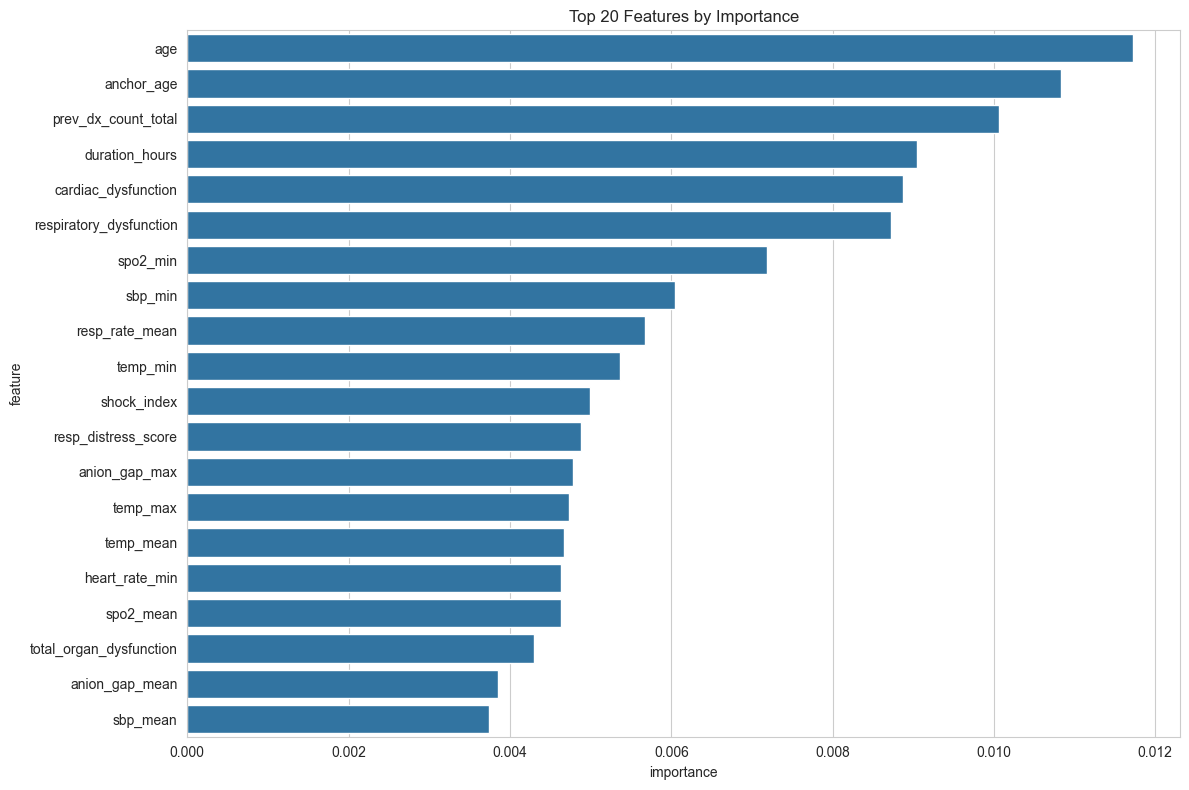

In [20]:
# Use model-based feature importance with a robust baseline model
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Select features with less than 50% missing values
usable_features = [col for col in numeric_features if df[col].isnull().mean() < 0.5]
X = df[usable_features].fillna(df[usable_features].median())
y = df['mortality']

# Train a simple model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot feature importance
features_imp = pd.DataFrame({
    'feature': usable_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

features_imp = features_imp[1:]

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=features_imp.head(20))
plt.title('Top 20 Features by Importance')
plt.tight_layout()
plt.show()

## Medical Feature Interaction Analysis

In [23]:
# Identify clinically meaningful feature interactions
from itertools import combinations

# Define groups of clinically related features
organ_systems = {
    'respiratory': [col for col in df.columns if any(x in col for x in ['resp', 'spo2', 'pao2'])],
    'cardiovascular': [col for col in df.columns if any(x in col for x in ['heart', 'sbp', 'dbp', 'map'])],
    'renal': [col for col in df.columns if any(x in col for x in ['creatinine', 'bun', 'urine'])],
    'hepatic': [col for col in df.columns if any(x in col for x in ['bilirubin', 'alt', 'ast'])]
}

# Create interaction terms for key features
for system, features in organ_systems.items():
    available_features = [f for f in features if f in df.columns and '_mean' in f][:2]  # Take top 2 features
    for f1, f2 in combinations(available_features, 2):
        if df[f1].notnull().sum() > 0.5*len(df) and df[f2].notnull().sum() > 0.5*len(df):
            # Create interaction feature
            interaction_name = f"{f1}_{f2}_interaction"
            df[interaction_name] = df[f1].fillna(df[f1].median()) * df[f2].fillna(df[f2].median())
            
            # Check predictive power
            if 'mortality' in df.columns:
                corr = abs(df[interaction_name].corr(df['mortality']))
                print(f"{interaction_name}: correlation with mortality = {corr:.4f}")

resp_rate_mean_spo2_mean_interaction: correlation with mortality = 0.1706
bun_mean_creatinine_mean_interaction: correlation with mortality = 0.0666


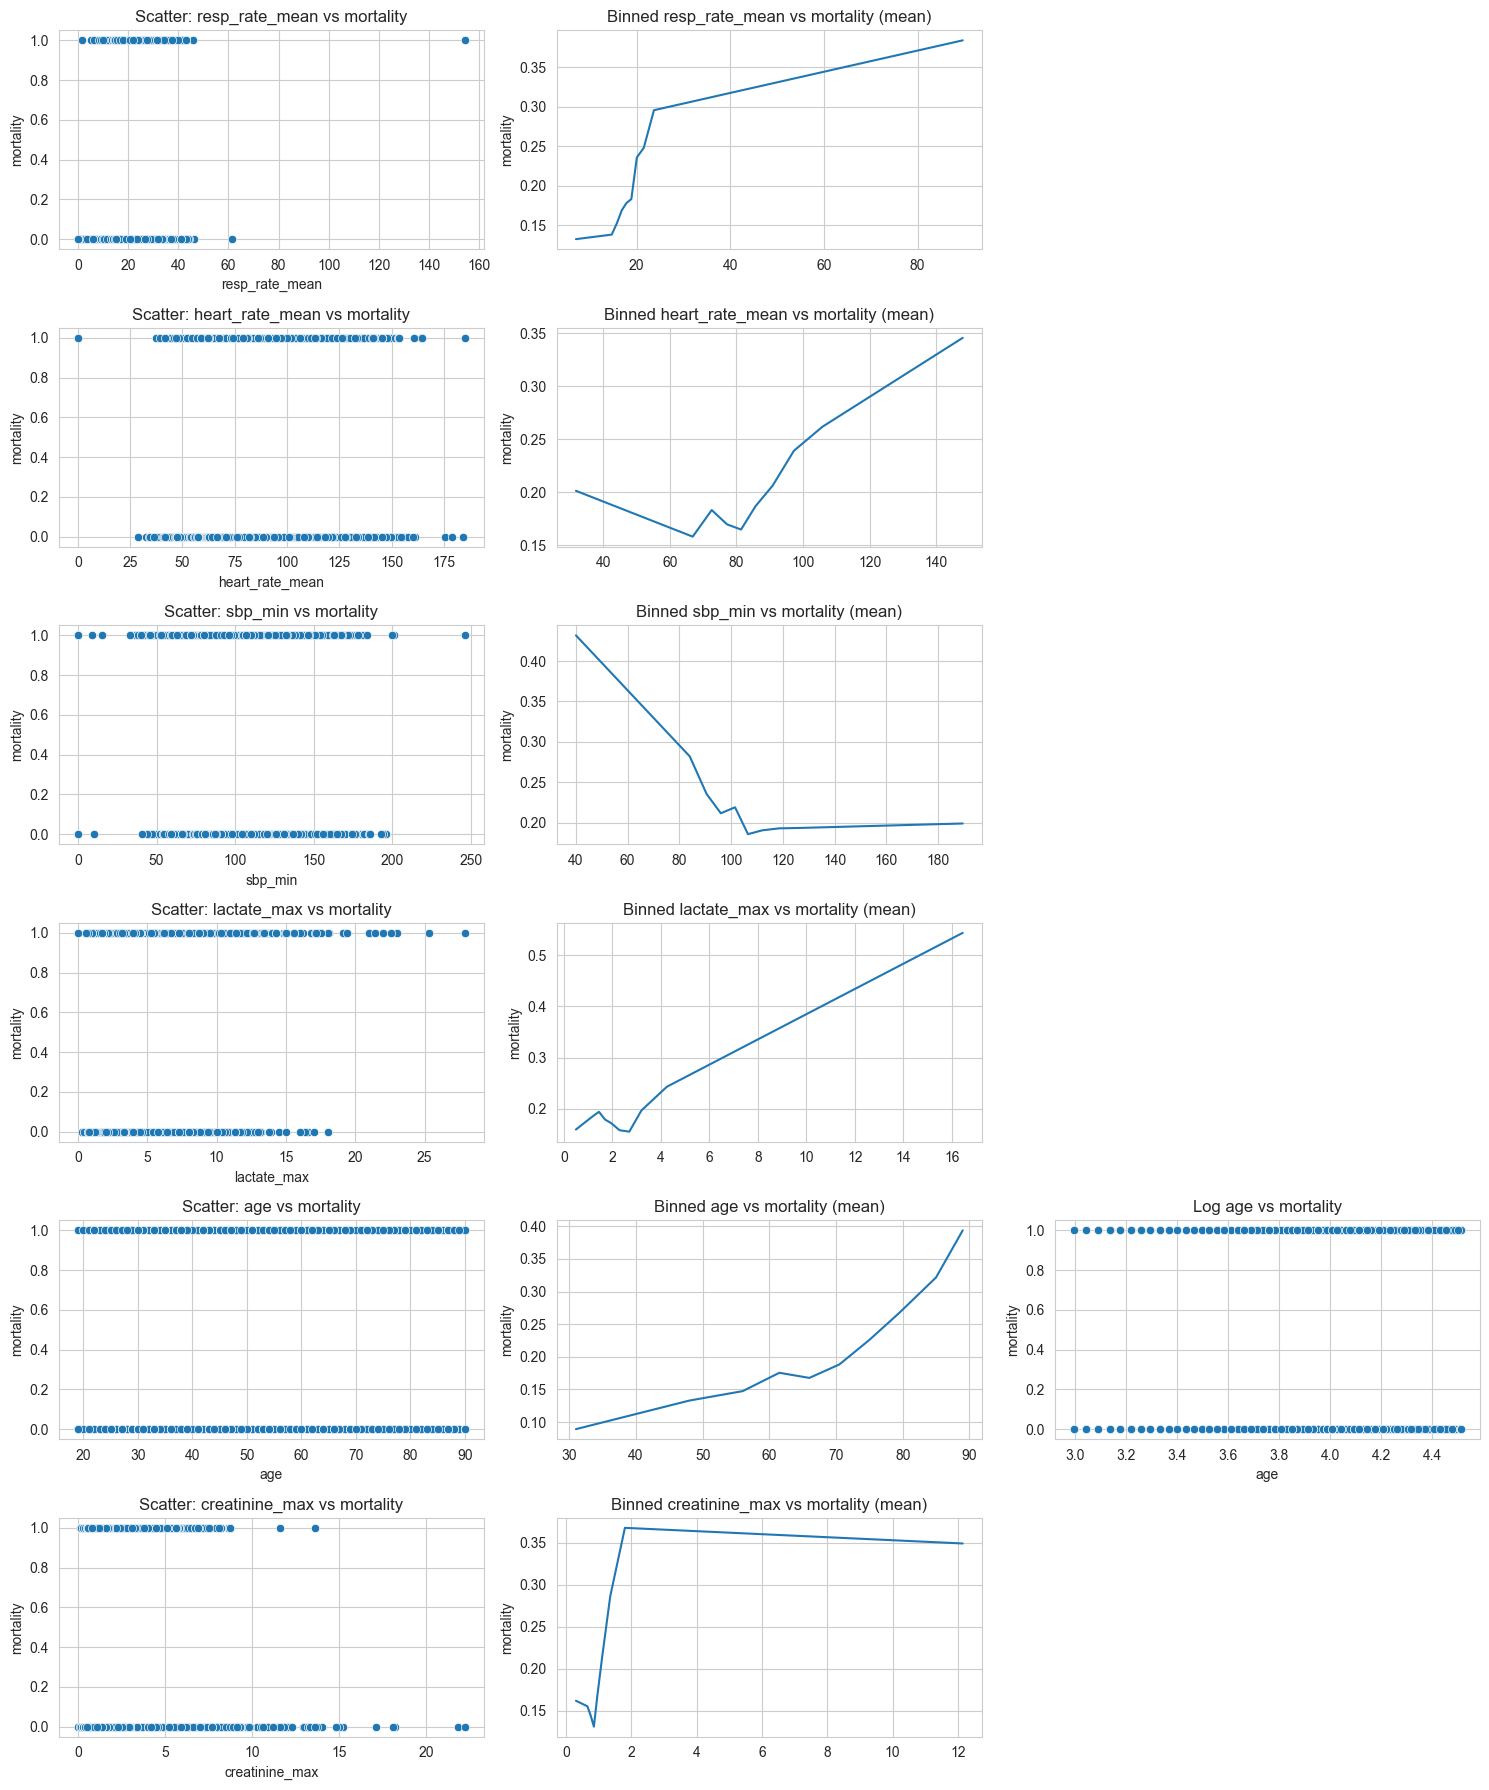

In [24]:
# Explore non-linear relationships with the target
import numpy as np

def plot_nonlinear_relationships(df, features, target='mortality', bins=10):
    plt.figure(figsize=(15, len(features)*3))
    
    for i, feature in enumerate(features):
        if feature in df.columns and df[feature].notnull().sum() > 0:
            plt.subplot(len(features), 3, i*3+1)
            sns.scatterplot(x=feature, y=target, data=df)
            plt.title(f'Scatter: {feature} vs {target}')
            
            # Calculate mean target value by feature bins
            df_temp = df[[feature, target]].dropna()
            df_temp['bins'] = pd.qcut(df_temp[feature], bins, duplicates='drop')
            grouped = df_temp.groupby('bins')[target].mean().reset_index()
            
            plt.subplot(len(features), 3, i*3+2)
            sns.lineplot(x=[g.mid for g in grouped['bins']], y=grouped[target])
            plt.title(f'Binned {feature} vs {target} (mean)')
            
            # Try log transformation
            if df[feature].min() > 0:
                plt.subplot(len(features), 3, i*3+3)
                sns.scatterplot(x=np.log1p(df[feature]), y=df[target])
                plt.title(f'Log {feature} vs {target}')
    
    plt.tight_layout()
    plt.show()

# Analyze top features from your feature importance analysis
top_features = ['resp_rate_mean', 'heart_rate_mean', 'sbp_min', 'lactate_max', 'age', 'creatinine_max']
plot_nonlinear_relationships(df, top_features)

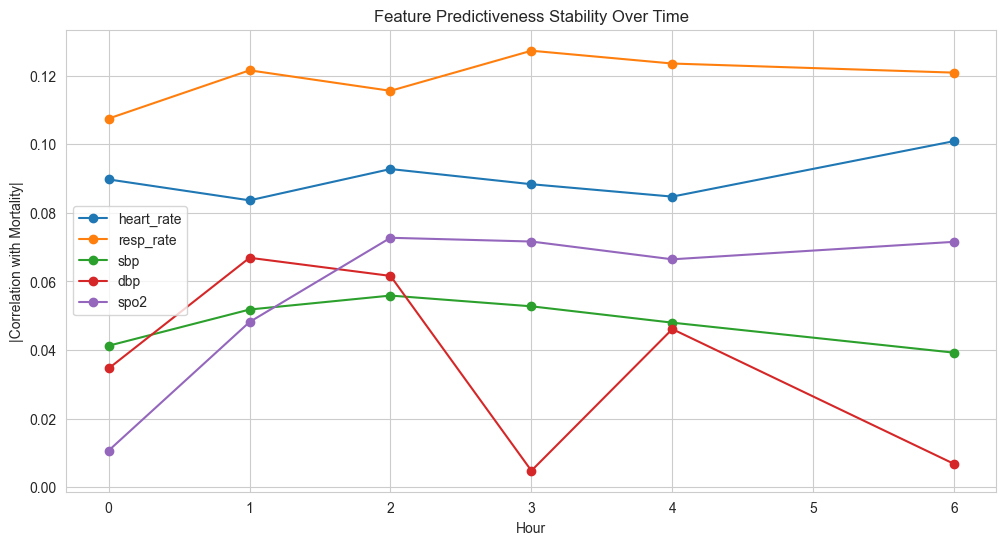

In [25]:
# Analyze the stability of feature predictiveness across different time windows
hour_points = [0, 1, 2, 3, 4, 6]
vital_features = ['heart_rate', 'resp_rate', 'sbp', 'dbp', 'spo2']

# Track correlation by hour
correlation_matrix = {}
for vital in vital_features:
    correlation_matrix[vital] = []
    
    for hour in hour_points:
        feature = f"{vital}_hour_{hour}"
        if feature in df.columns and df[feature].notnull().sum() > 0:
            corr = abs(df[feature].fillna(df[feature].median()).corr(df['mortality']))
            correlation_matrix[vital].append(corr)
        else:
            correlation_matrix[vital].append(np.nan)

# Plot correlation stability over time
plt.figure(figsize=(12, 6))
for vital, correlations in correlation_matrix.items():
    plt.plot(hour_points, correlations, 'o-', label=vital)

plt.title('Feature Predictiveness Stability Over Time')
plt.xlabel('Hour')
plt.ylabel('|Correlation with Mortality|')
plt.legend()
plt.grid(True)
plt.show()

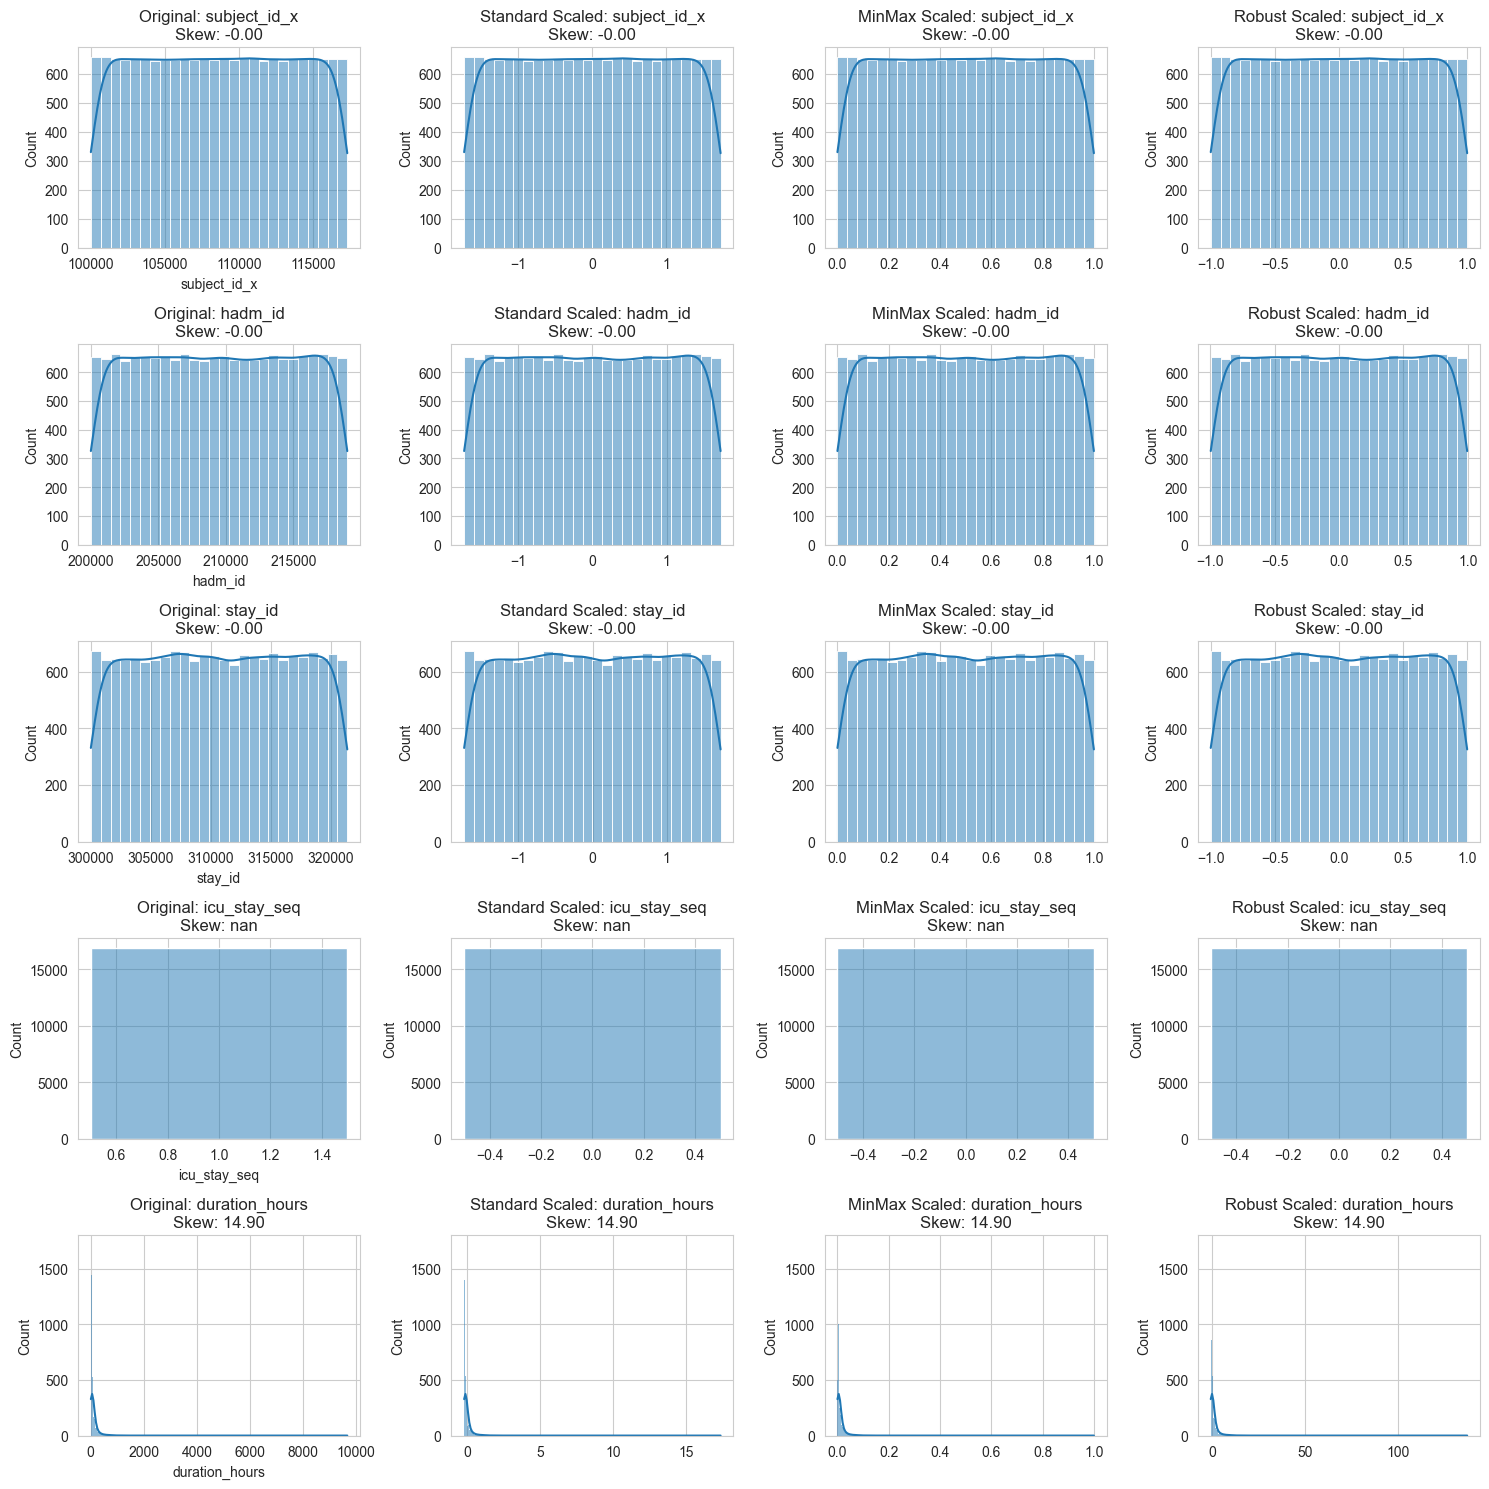

In [26]:
# Analyze different transformation strategies
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy import stats

# Test different scaling methods on key features
key_features = [col for col in numeric_features if df[col].isnull().mean() < 0.3][:5]
scalers = {
    'Standard': StandardScaler(),
    'MinMax': MinMaxScaler(),
    'Robust': RobustScaler()
}

plt.figure(figsize=(15, len(key_features)*3))
for i, feature in enumerate(key_features):
    feature_data = df[feature].dropna()
    
    # Plot original distribution
    plt.subplot(len(key_features), 4, i*4+1)
    sns.histplot(feature_data, kde=True)
    plt.title(f'Original: {feature}\nSkew: {stats.skew(feature_data):.2f}')
    
    # Try different transformations
    col_idx = 2
    for name, scaler in scalers.items():
        plt.subplot(len(key_features), 4, i*4+col_idx)
        transformed = scaler.fit_transform(feature_data.values.reshape(-1, 1)).flatten()
        sns.histplot(transformed, kde=True)
        plt.title(f'{name} Scaled: {feature}\nSkew: {stats.skew(transformed):.2f}')
        col_idx += 1

plt.tight_layout()
plt.show()

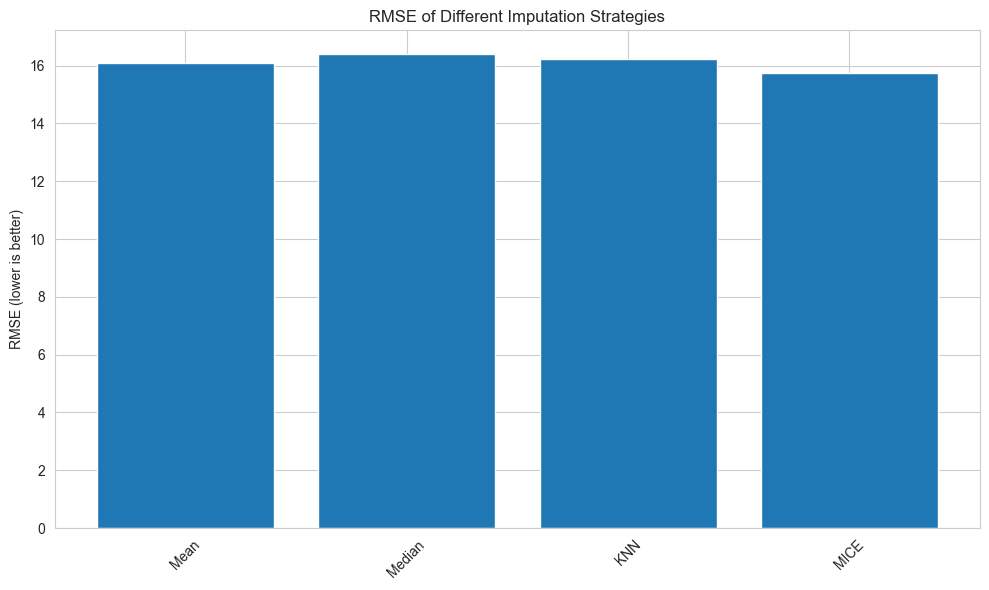

In [27]:
# Test different imputation strategies
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Create dataset with artificially removed values to test imputation
def test_imputation_strategies(df, test_cols, missing_rate=0.1):
    # Select columns with low missingness for testing
    test_data = df[test_cols].dropna()
    
    # Create mask of values to artificially remove
    np.random.seed(42)
    mask = np.random.rand(*test_data.shape) < missing_rate
    
    # Create copy with artificial missingness
    test_missing = test_data.copy()
    test_missing[mask] = np.nan
    
    # Ground truth values that were masked
    ground_truth = test_data.values[mask]
    
    # Test different imputers
    imputers = {
        'Mean': SimpleImputer(strategy='mean'),
        'Median': SimpleImputer(strategy='median'),
        'KNN': KNNImputer(n_neighbors=5),
        'MICE': IterativeImputer(estimator=RandomForestRegressor(n_estimators=10), max_iter=10)
    }
    
    results = {}
    for name, imputer in imputers.items():
        imputed = imputer.fit_transform(test_missing)
        imputed_values = imputed[mask]
        rmse = np.sqrt(mean_squared_error(ground_truth, imputed_values))
        results[name] = rmse
    
    return results

# Test on a few important clinical features
imputation_test_features = ['heart_rate_mean', 'resp_rate_mean', 'sbp_mean', 'bun_mean', 'creatinine_mean']
imputation_results = test_imputation_strategies(df, imputation_test_features)

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(imputation_results.keys(), imputation_results.values())
plt.title('RMSE of Different Imputation Strategies')
plt.ylabel('RMSE (lower is better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary and Insight

In [18]:
# Final summary and insights
print("==== DESCRIPTIVE ANALYSIS SUMMARY ====")
print(f"Total patients analyzed: {len(df)}")
print(f"Total features analyzed: {len(df.columns)}")
print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")
print("\nMissingness:")
print(f"Features with >50% missing data: {sum(df.isnull().mean() > 0.5)}")
print(f"Features with <10% missing data: {sum(df.isnull().mean() < 0.1)}")

print("\nData Distribution:")
print("Highly skewed features (abs(skew) > 2):")
skewed_features = desc_stats[abs(desc_stats['skewness']) > 2].index.tolist()
print(skewed_features[:10])

print("\nCorrelation:")
print(f"Highly correlated feature pairs (|r| > 0.7): {len(corr_pairs)}")

if 'gender_numeric' in df.columns:
    gender_ratio = df['gender_numeric'].mean()
    print(f"\nGender ratio: {gender_ratio:.2f} (proportion male)")

print("\nKey clinical indicators with highest abnormal rates:")
if 'clinical_summary' in locals():
    abnormal_metrics = clinical_summary.sort_values('Within Normal Range (%)', ascending=True)
    for _, row in abnormal_metrics.head(5).iterrows():
        print(f"- {row['Metric']}: {100 - row['Within Normal Range (%)']:.1f}% abnormal")

# Suggest next steps for analysis
print("\nRecommended next steps:")
print("1. Address missing data with appropriate imputation strategies")
print("2. Transform skewed variables for modeling")
print("3. Consider dimensionality reduction using PCA findings")
print("4. Investigate outliers in key clinical measurements")
print("5. Explore relationships between clinical features and outcomes")

==== DESCRIPTIVE ANALYSIS SUMMARY ====
Total patients analyzed: 16922
Total features analyzed: 469
Numeric features: 433
Categorical features: 11

Missingness:
Features with >50% missing data: 240
Features with <10% missing data: 103

Data Distribution:
Highly skewed features (abs(skew) > 2):
['duration_hours', 'resp_rate_hour_2', 'map_hour_0', 'map_hour_1', 'map_hour_2', 'map_hour_3', 'map_hour_4', 'map_hour_6', 'temp_hour_0', 'temp_hour_1']

Correlation:
Highly correlated feature pairs (|r| > 0.7): 227

Gender ratio: 0.55 (proportion male)

Key clinical indicators with highest abnormal rates:
- temp_mean: 99.0% abnormal
- glucose_mean: 68.9% abnormal
- creatinine_mean: 62.1% abnormal
- sodium_mean: 52.5% abnormal
- potassium_mean: 52.1% abnormal

Recommended next steps:
1. Address missing data with appropriate imputation strategies
2. Transform skewed variables for modeling
3. Consider dimensionality reduction using PCA findings
4. Investigate outliers in key clinical measurements
5.